<a href="https://colab.research.google.com/github/Stephyj2/Predicting-fraudulent-transactions-for-a-financial-company/blob/main/Internship_Assignment_Stephy's_Project_(Fraud_Detection)_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project:  Predicting fraudulent transactions for a financial company**

###**Business Objective:**

The goal is to develop a predictive model to predict fraudulent transactions for a financial company.

The data file contains  6362620 rows and 10 columns.



####**Variable Descriptions**
- **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
- **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
- **amount** - amount of the transaction in local currency.
- **nameOrig** - customer who started the transaction
- **oldbalanceOrg** - initial balance before the transaction
- **newbalanceOrig** - new balance after the transaction
- **nameDest** - customer who is the recipient of the transaction
- **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
- **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
- **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
-**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


### **Problem Statement:**
A financial company is facing an increasing number of fraudulent transactions, which significantly impacts its operations and customer trust. The company has collected a large dataset of historical transactions, including both legitimate and fraudulent activities.
The **objective** is to develop a **machine learning model** that can accurately predict **fraudulent transactions** in real-time, enabling the company to take proactive measures to prevent financial losses and improve fraud detection efficiency.



In [ ]:
#Memory Usage in this dataset
import psutil
print(f"RAM: {psutil.virtual_memory()}")
print(f"Disk: {psutil.disk_usage('/')}")

RAM: svmem(total=13609431040, available=10232348672, percent=24.8, used=3039256576, free=8125652992, active=1437044736, inactive=3727855616, buffers=468844544, cached=1975676928, shared=4599808, slab=229711872)
Disk: sdiskusage(total=115658190848, used=31416512512, free=84224901120, percent=27.2)


#**Initial Observations:**
The dataset has 1,048,575 rows and 11 columns.Here are the key features and their types:

1. **step:** Unit of time (integer).
2. **type:** Transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
3. **amount:** Transaction amount (float).
4. **nameOrig:** Identifier for the customer initiating the transaction (object).
5. **oldbalanceOrg:** Initial balance before the transaction (float).
6. **newbalanceOrig:** New balance after the transaction (float).
7. **nameDest:** Identifier for the transaction recipient (object).
8. **oldbalanceDest:** Recipient's initial balance (float).
9. **newbalanceDest:** Recipient's new balance (float).
10. **isFraud:** Fraudulent transaction indicator (binary: 0 = Not Fraud, 1 = Fraud).
11. **isFlaggedFraud:** Flag for transactions over $200,000 (binary).


Problem is a classification problem. The target variable in this dataset, **isFraud**, is binary, indicating whether a transaction is fraudulent or not:

- **0: The transaction is not fraudulent.**
- **1: The transaction is fraudulent.**

#Part 1: EDA

###**Step 1: Data Exploration**

**1. Load the dataset and perform exploratory data analysis (EDA)**

In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load data
data_fd = pd.read_csv('/content/drive/MyDrive/Assignment_Accredian_Data _Science _Internshi/Fraud.csv')

In [ ]:
#First 5 rows
data_fd.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [ ]:
#last 5 rows
data_fd.tail()

step      type     amount     nameOrig  oldbalanceOrg  \
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1048570       347245.65   C435674507       484329.37       616886.72        0   
1048571        80627.64   M668364942            0.00            0.00        0   
1048572         6404.95  M1355182933            0.00            0.00        0   
1048573        80584.95  M1964992463            0.00            0.00        0   
1048574        69134.92   M677577406            0.00            0.00        0   

         isFlaggedFraud  
1048570               0  
1048571               0  
1048572               0  
1048573               0  
1048574               0

In [ ]:
#Number of columns in the dataset
data_fd.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
#Datatypes of the columns
data_fd.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

**Dataset Structure:**
- Numerical Features: 8 columns (int64, float64)
- Categorical Features: 3 columns (object)

In [ ]:
#Typcasting
# Convert categorical columns to the 'category' data type
categorical_features = ['nameOrig','nameDest','type']
# Typecasting categorical columns
for feature in categorical_features:
    data_fd[feature] = data_fd[feature].astype('category')

In [ ]:
#Number of rows and columns
data_fd.shape

(1048575, 11)

**The data file contains 1048575 rows information and 11 columns**

In [ ]:
#Info of dataset
data_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   step            1048575 non-null  int64   
 1   type            1048575 non-null  category
 2   amount          1048575 non-null  float64 
 3   nameOrig        1048575 non-null  category
 4   oldbalanceOrg   1048575 non-null  float64 
 5   newbalanceOrig  1048575 non-null  float64 
 6   nameDest        1048575 non-null  category
 7   oldbalanceDest  1048575 non-null  float64 
 8   newbalanceDest  1048575 non-null  float64 
 9   isFraud         1048575 non-null  int64   
 10  isFlaggedFraud  1048575 non-null  int64   
dtypes: category(3), float64(5), int64(3)
memory usage: 132.8 MB


##**Handling Missing Values**




In [ ]:
#To check for missing values
data_fd.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**No missing values**

In [ ]:
# Check for NaN values in the entire dataset
nan_summary = data_fd.isna().sum()

# Display the columns that have NaN values
nan_summary = nan_summary[nan_summary > 0]

print("Columns with NaN values:")
print(nan_summary)

Columns with NaN values:
Series([], dtype: int64)


**No columns with NaN values**

In [ ]:
#Summary statistics
data_fd.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06       1048575.0  
mean     9.781600e+05    1.114198e+06  1.089097e-03             0.0  
std      2.296780e+06    2.416593e+06  3.298351e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
50%      1.263772e+05    2.182604e+05  0.000000e+00             0.0  
75%      9.159235e+05    1.149808e+06  0.000000e+00             0.0  
max      4.210000e+07    4.220000e+07  1.000000e+00             0.0


- **Step** (time step of transactions) ranges from 1 to 95, with a mean of 26.97.
- **Transaction** amounts vary widely, with an average of 158,667.04 and a maximum of 10 million.
- **isFlaggedFraud:** This field is always zero, meaning no transactions were flagged as potentially fraudulent.
- **Balances** of origin and destination accounts show high variability, with means around 900,000 but reaching up to 42 million.
- Only about **0.1% of transactions** are labeled as fraud, and no transactions were flagged as fraud.
- **isFraud:** This column indicates whether the transaction is fraudulent.**Class Imbalance:** The dataset is highly imbalanced with only **~0.11%** fraudulent transactions.
- **OldbalanceOrg and NewbalanceOrig:** These represent the initial and final balances of the origin account before and after the transaction. The balances range from $0 to nearly $39 million, with average balances around $874,000 to $893,000.
- **OldbalanceDest and NewbalanceDest:** These show the initial and final balances of the destination account, ranging from $0 to $42 million, with averages around $978,000  to $1.1 million.

In [ ]:
#copying original dataset
data_copy = data_fd.copy()

###**1.1 Univariate Numerical variable analysis**

In [ ]:
# Take a 10% sample of the data.Here used since visualisation become difficult due to memeory space occupied.So reduced
'''Sample the Data: Instead of working with the entire dataset,
 I worked with a smaller subset to visualize patterns without sacrificing too much accuracy.
 Here's how to take a random'''
#data_fd = data_fd.sample(frac=0.1, random_state=42)

In [ ]:
#numerical columns in dataset
df_fd_numerical = data_fd.select_dtypes(include=['int64', 'float64'])
df_fd_numerical.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0

In [ ]:
#numerical data mean and median
df_fd_numerical.mean()

step              2.693246e+01
amount            1.590241e+05
oldbalanceOrg     8.558373e+05
newbalanceOrig    8.752682e+05
oldbalanceDest    9.754137e+05
newbalanceDest    1.113188e+06
isFraud           1.115795e-03
isFlaggedFraud    0.000000e+00
dtype: float64

In [ ]:
df_fd_numerical.median()

step                  20.000
amount             75974.690
oldbalanceOrg      16045.000
newbalanceOrig         0.000
oldbalanceDest    124925.060
newbalanceDest    217942.235
isFraud                0.000
isFlaggedFraud         0.000
dtype: float64

In [ ]:
for col in df_fd_numerical.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].min(), ", ",df_fd_numerical[col].max(),"]"))

range of step: [1, 95]
range of amount: [0.2, 9465988.82]
range of oldbalanceOrg: [0.0, 38400000.0]
range of newbalanceOrig: [0.0, 38400000.0]
range of oldbalanceDest: [0.0, 37000000.0]
range of newbalanceDest: [0.0, 37000000.0]
range of isFraud: [0, 1]
range of isFlaggedFraud: [0, 0]


In [ ]:
for col in df_fd_numerical.columns:
      print("Standard deviation and varince of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].std(), ", ",df_fd_numerical[col].var(),"]"))

Standard deviation and varince of step: [15.674799518641478, 245.69933994960311]
Standard deviation and varince of amount: [268226.63764237316, 71945529140.93295]
Standard deviation and varince of oldbalanceOrg: [2914889.6921718675, 8496581917529.804]
Standard deviation and varince of newbalanceOrig: [2951156.8593453574, 8709326808461.154]
Standard deviation and varince of oldbalanceDest: [2297490.4419674906, 5278462330931.976]
Standard deviation and varince of newbalanceDest: [2420631.148589302, 5859455157520.764]
Standard deviation and varince of isFraud: [0.03338503145445013, 0.0011145603252146249]
Standard deviation and varince of isFlaggedFraud: [0.0, 0.0]


In [ ]:
for col in df_fd_numerical.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].kurt(), ", ",df_fd_numerical[col].skew(),"]"))

Kurtosis and Skewness of step: [3.4638291181085648, 1.3088021515473935]
Kurtosis and Skewness of amount: [75.2738444479367, 6.044950054499062]
Kurtosis and Skewness of oldbalanceOrg: [31.805690500176993, 5.18042312990244]
Kurtosis and Skewness of newbalanceOrig: [31.024042650896888, 5.11413454322555]
Kurtosis and Skewness of oldbalanceDest: [43.04655102713885, 5.4086797645857825]
Kurtosis and Skewness of newbalanceDest: [37.766726422868274, 5.043445769822013]
Kurtosis and Skewness of isFraud: [891.2658946231064, 29.887269783980948]
Kurtosis and Skewness of isFlaggedFraud: [0.0, 0.0]


In [ ]:
#Copying oriinal dataframe
df_original = data_fd.copy()

####**1.1.1Visualisation**

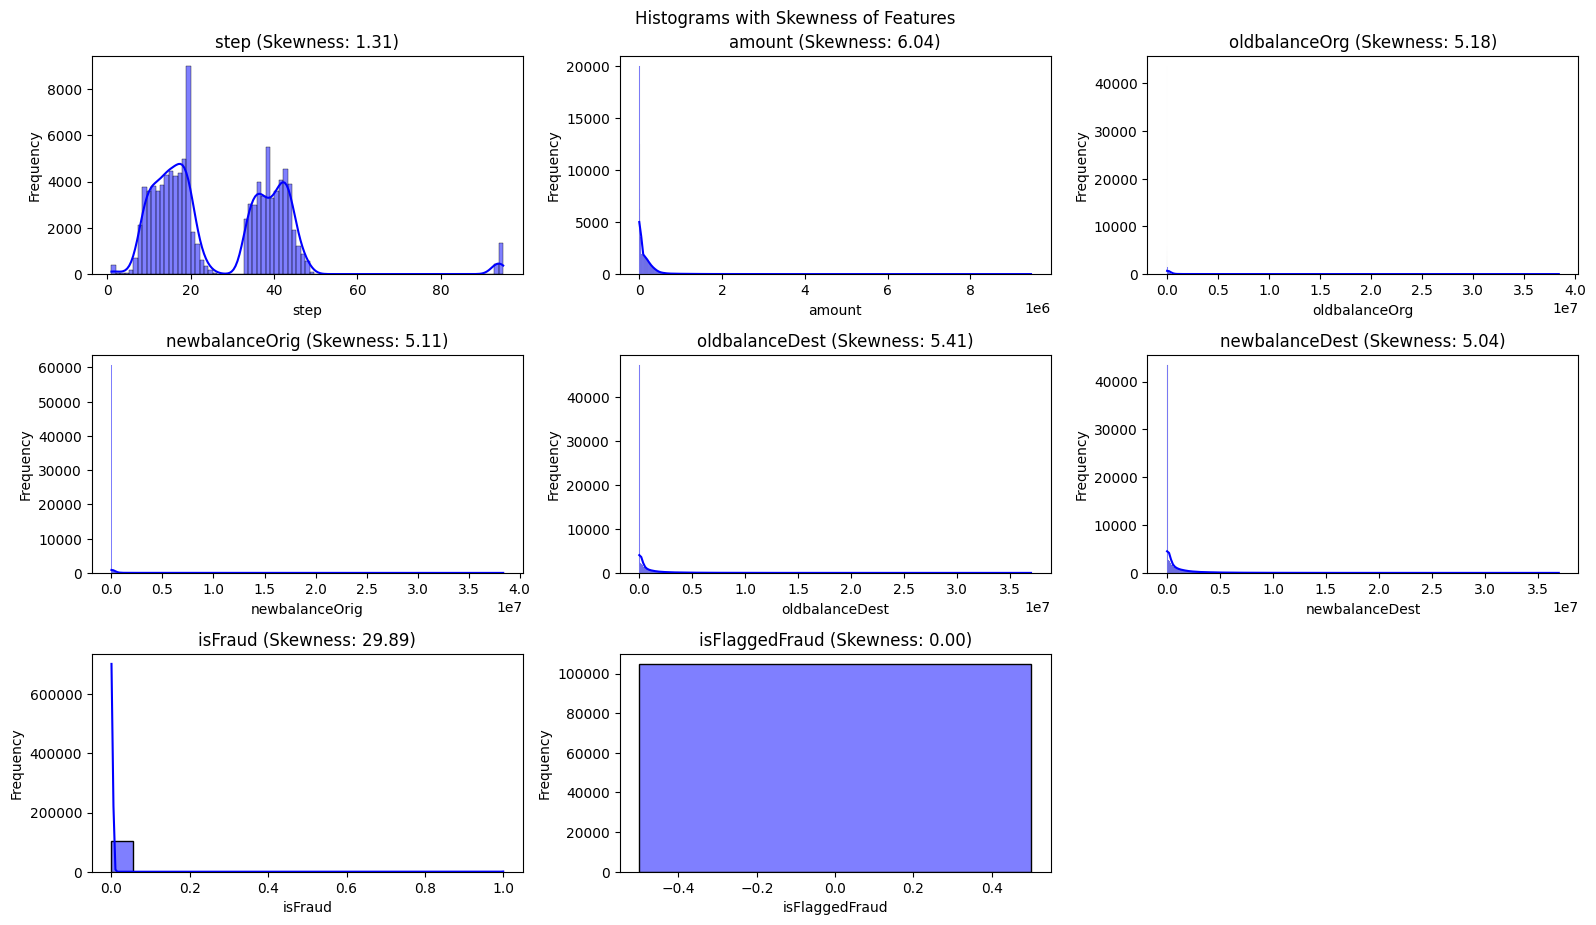

In [ ]:
#Histogram plot of numerical columns
# Set up the figure and axes
plt.figure(figsize=(16, 12))
# Loop through each numerical feature to plot its histogram
for i, col in enumerate(df_fd_numerical):
    plt.subplot(4, 3, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data_fd[col], kde=True, color='blue', edgecolor='black')
    plt.title(f'{col} (Skewness: {df_fd_numerical[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms with Skewness of Features')
plt.tight_layout()
plt.show()

**Key observation:**

- **Step:** The time step feature has a moderately right-skewed distribution (skewness = 1.29), with multiple peaks indicating periodic transaction patterns.
- **Amount, OldbalanceOrg, NewbalanceOrig, OldbalanceDest, NewbalanceDest:** These financial features show highly right-skewed distributions **(skewness > 5)**, with the majority of values concentrated near zero, reflecting that most transactions involve small amounts or low account balances, while a few transactions involve significantly large amounts.
- **isFraud:** The fraud label is extremely right-skewed (skewness = 30.25), with most transactions being non-fraudulent, highlighting the class imbalance in the dataset.
- **isFlaggedFraud:** There is no variation in this feature (skewness = 0), indicating no transactions were flagged for fraud, consistent with earlier observations.
Overall, the features exhibit significant **skewness**, especially the financial variables, which suggests the need for potential transformations to handle the skewed distributions for modeling. The **class imbalance** in fraud detection is also clear from the skewness of the fraud-related features.

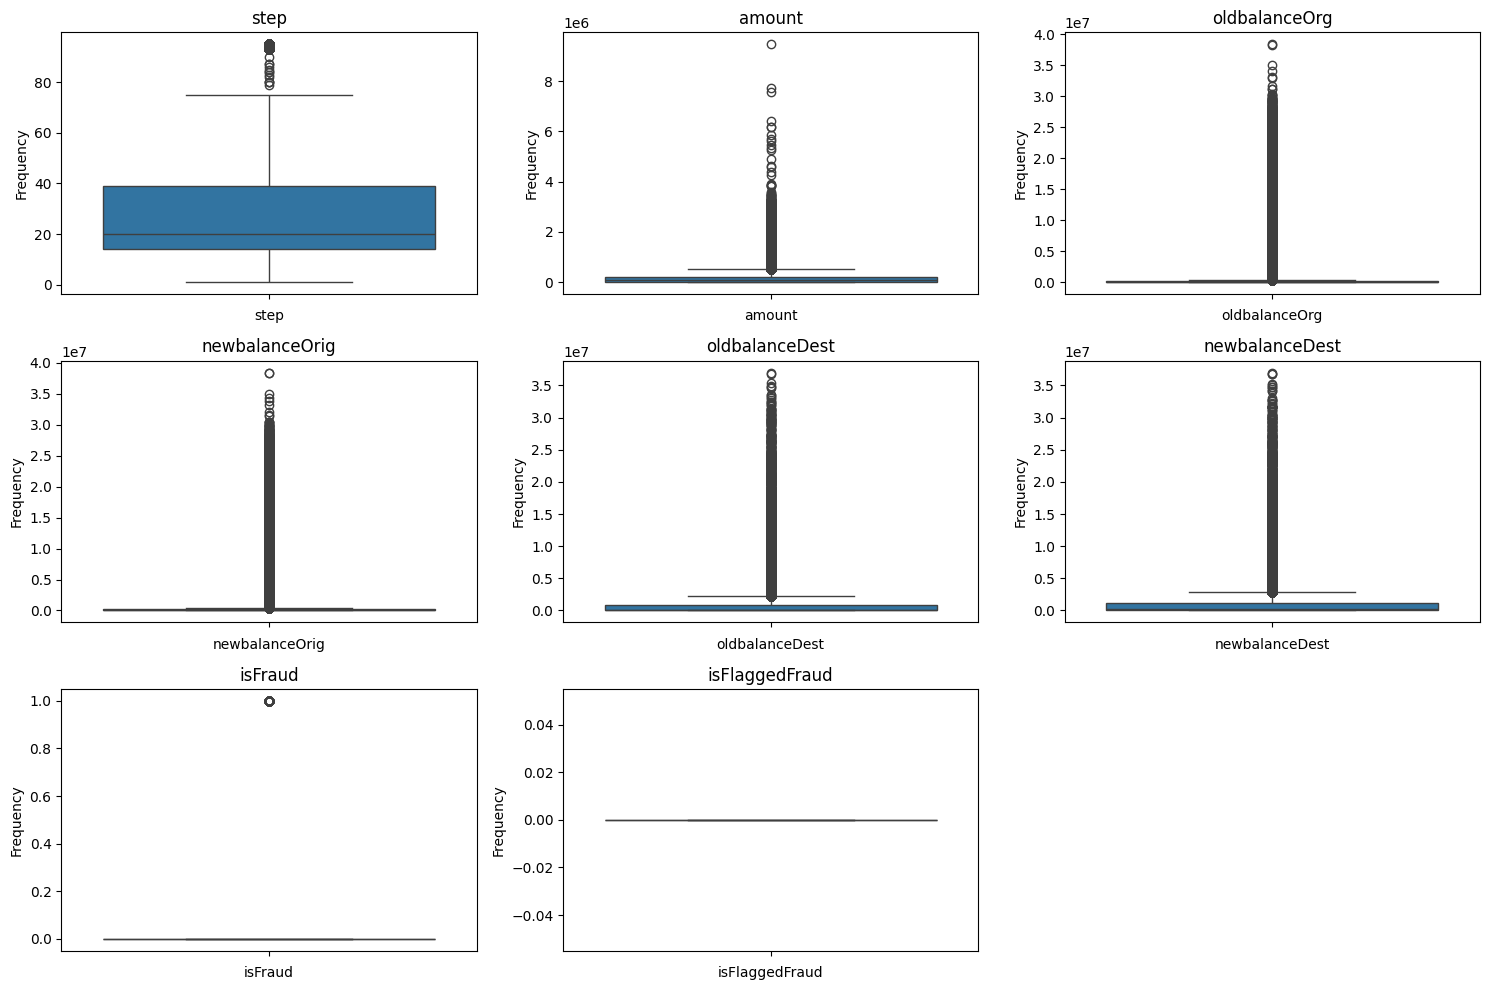

In [ ]:
#Boxplot for numerical columns
def plot_numerical_boxplot(df_fd_numerical, columns, rows=3, cols=3): # Increased rows to 3 to accomodate 9 plots
    """
    Function to plot the distributions of numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to plot.
    rows (int): Number of rows in the subplot grid.
    cols (int): Number of columns in the subplot grid.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(df_fd_numerical[col], ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_numerical_boxplot(df_fd_numerical,df_fd_numerical.columns, rows=3, cols=3)

- **step:** Moderate spread; a few outliers beyond the upper quartile.
amount: High concentration near zero; many extreme outliers indicating large transactions.
- **oldbalanceOrg:** Most values near zero; extreme outliers showing large original balances.
- **oldbalanceDest:** Similar to "oldbalanceOrg"; high concentration near zero, with several large outliers.
-**newbalanceOrig:** Majority near zero; a few outliers showing high new balances in origin accounts.
- **newbalanceDest:** Pattern mirrors "newbalanceOrig"; concentrated near zero, with significant outliers.
- **isFraud:** Highly imbalanced with most values being zero; few cases of fraud as outliers at 1.
- **isFlaggedFraud:** Little to no variation; likely very few flagged fraud cases.

In [ ]:
#correlation
df_fd_numerical.corr()

step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.030863      -0.005998       -0.006214   
amount         -0.030863  1.000000       0.001493       -0.003364   
oldbalanceOrg  -0.005998  0.001493       1.000000        0.999087   
newbalanceOrig -0.006214 -0.003364       0.999087        1.000000   
oldbalanceDest -0.001774  0.212332       0.091988        0.093725   
newbalanceDest -0.019793  0.312542       0.062828        0.062245   
isFraud         0.046142  0.111227       0.002016       -0.009913   
isFlaggedFraud       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                 -0.001774       -0.019793  0.046142             NaN  
amount                0.212332        0.312542  0.111227             NaN  
oldbalanceOrg         0.091988        0.062828  0.002016             NaN  
newbalanceOrig        0.093725        0.062245 -0.009913             NaN  
oldbalanceDest        1.000000        0.977977 -0.010080             NaN  
newbalanceDest        0.977977        1.000000 -0.001742             NaN  
isFraud              -0.010080       -0.001742  1.000000             NaN  
isFlaggedFraud             NaN             NaN       NaN             NaN

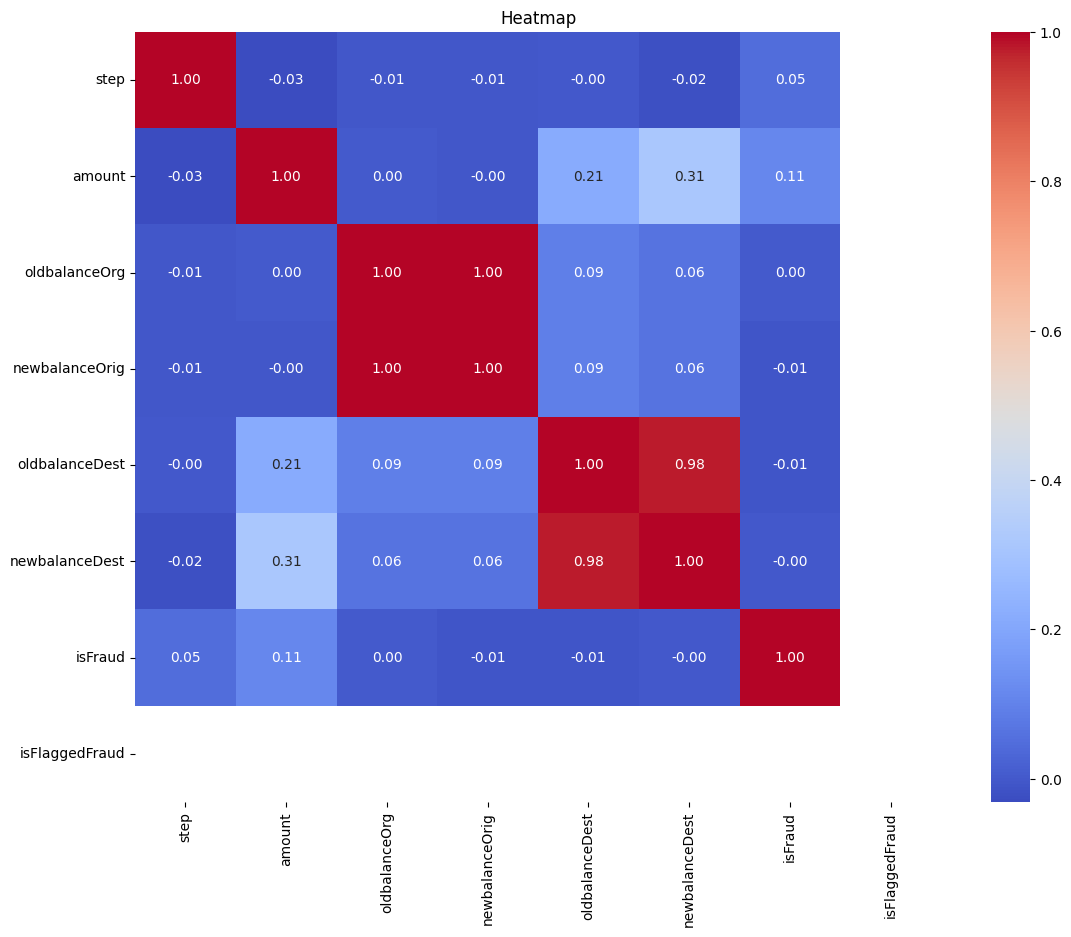

In [ ]:
#Heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(df_fd_numerical.corr(),annot=True,fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

- **Strong correlations** between **oldbalanceOrg and newbalanceOrig**, and between **oldbalanceDest and newbalanceDest** suggest potential **multicollinearity** that could be addressed during feature engineering.
- The **weak correlation** between **isFraud** and other features hints that **fraud detection** is likely influenced by more **subtle or non-linear relationships** in the data.

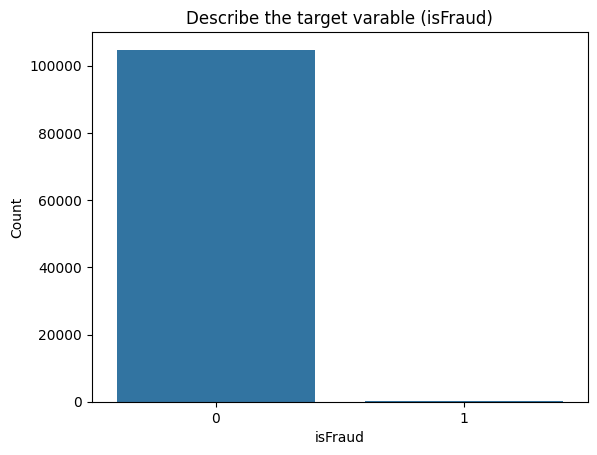

In [ ]:
# Describe the target varable
sns.countplot(x='isFraud',data= df_fd_numerical)
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.title("Describe the target varable (isFraud)")
plt.show()

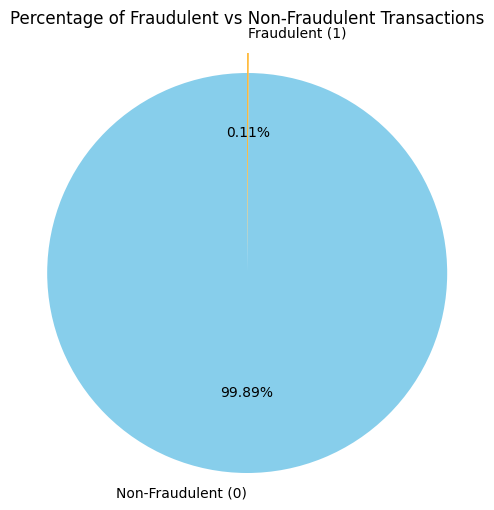

In [ ]:
#pie chart % of target variable
# Assuming df is your dataframe
fraud_counts = df_fd_numerical['isFraud'].value_counts()

# Labels for the pie chart
labels = ['Non-Fraudulent (0)', 'Fraudulent (1)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['skyblue', 'orange'], explode=[0, 0.1])
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()

The **pie chart** representing the percentage of **fraudulent vs non-fraudulent** transactions.

The key details are:
- **Non-Fraudulent (0)**: transactions make up 99.89% of the total transactions, as indicated by the large blue portion of the pie chart.
- **Fraudulent (1)**: transactions account for only 0.11%, which is represented by a very thin slice in orange at the top of the chart.
This visual highlights the extreme **imbalance** between **fraudulent and non-fraudulent transactions**, indicating that fraudulent transactions are rare within this dataset.

- **Next Actions**<br>
This **imbalance** suggests that specialized techniques, such as **oversampling (e.g., SMOTE) or undersampling.**

###**2.3 Univariate Categorical columns**


In [ ]:
#categorical columns
df_category = data_fd.select_dtypes(include=['category'])
df_category.head()

type     nameOrig     nameDest
781974  TRANSFER  C2141567696   C883779624
937737   CASH_IN   C696392496  C1021427324
907828   CASH_IN   C243566485  C1585728667
784628   PAYMENT   C662848077  M1063211872
662460  CASH_OUT  C2100965538  C1140936910

In [ ]:
df_category.describe()

type     nameOrig    nameDest
count     104858       104858      104858
unique         5       104856       76602
top     CASH_OUT  C1834143371  C306206744
freq       37385            2          14

In [ ]:
df_category.value_counts()

type      nameOrig     nameDest   
CASH_IN   C1000090707  C36074080      1
PAYMENT   C1503457343  M1937881858    1
          C1504354202  M936506741     1
          C1504310517  M1072858646    1
          C1504181023  M1820483741    1
                                     ..
CASH_OUT  C1638169423  C1205080315    1
          C1638126226  C1028048002    1
          C1637986918  C1945053532    1
          C1637954808  C1382394077    1
TRANSFER  C999953972   C970612443     1
Name: count, Length: 104858, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select only categorical features for encoding
categorical_features = data_fd.select_dtypes(include=['category']).columns

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = data_fd.copy() # Create df_encoded here

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_features:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

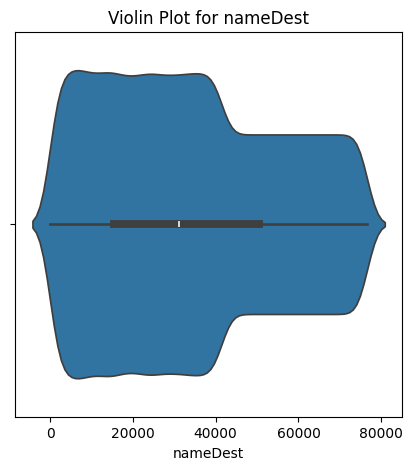

In [ ]:
plt.figure(figsize=(5, 5))
# Use seaborn's barplot function
sns.violinplot(x='nameDest', data= df_encoded)
plt.title('Violin Plot for nameDest')
plt.show()  # Show the plot

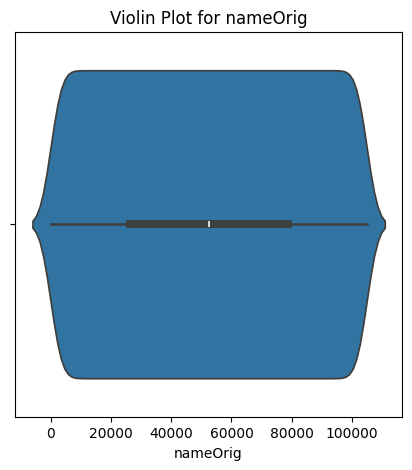

In [ ]:
plt.figure(figsize=(5, 5))
sns.violinplot(x='nameOrig', data= df_encoded)
plt.title(f'Violin Plot for nameOrig')
plt.show()

Text(0.5, 1.0, 'Violin Plot for Type')

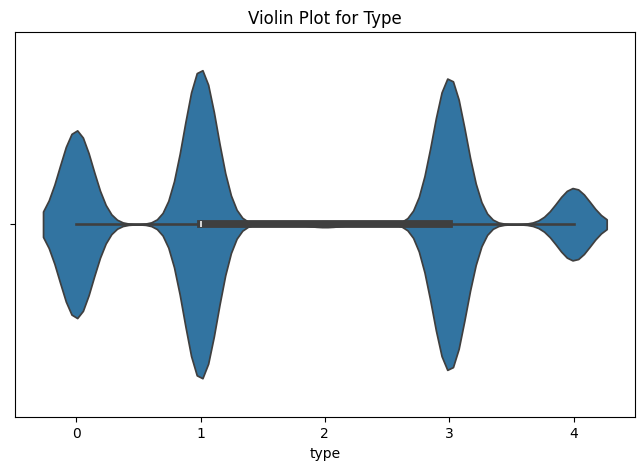

In [ ]:
#countplot for categorial varables
# Define the categorical columns
plt.figure(figsize=(8, 5))
sns.violinplot(x= 'type', data= df_encoded)
plt.title(f'Violin Plot for Type')

###**2.4 Bivariate variable analysis**

####**2.4.1Numerical-Categorical Bivariate Visualization**

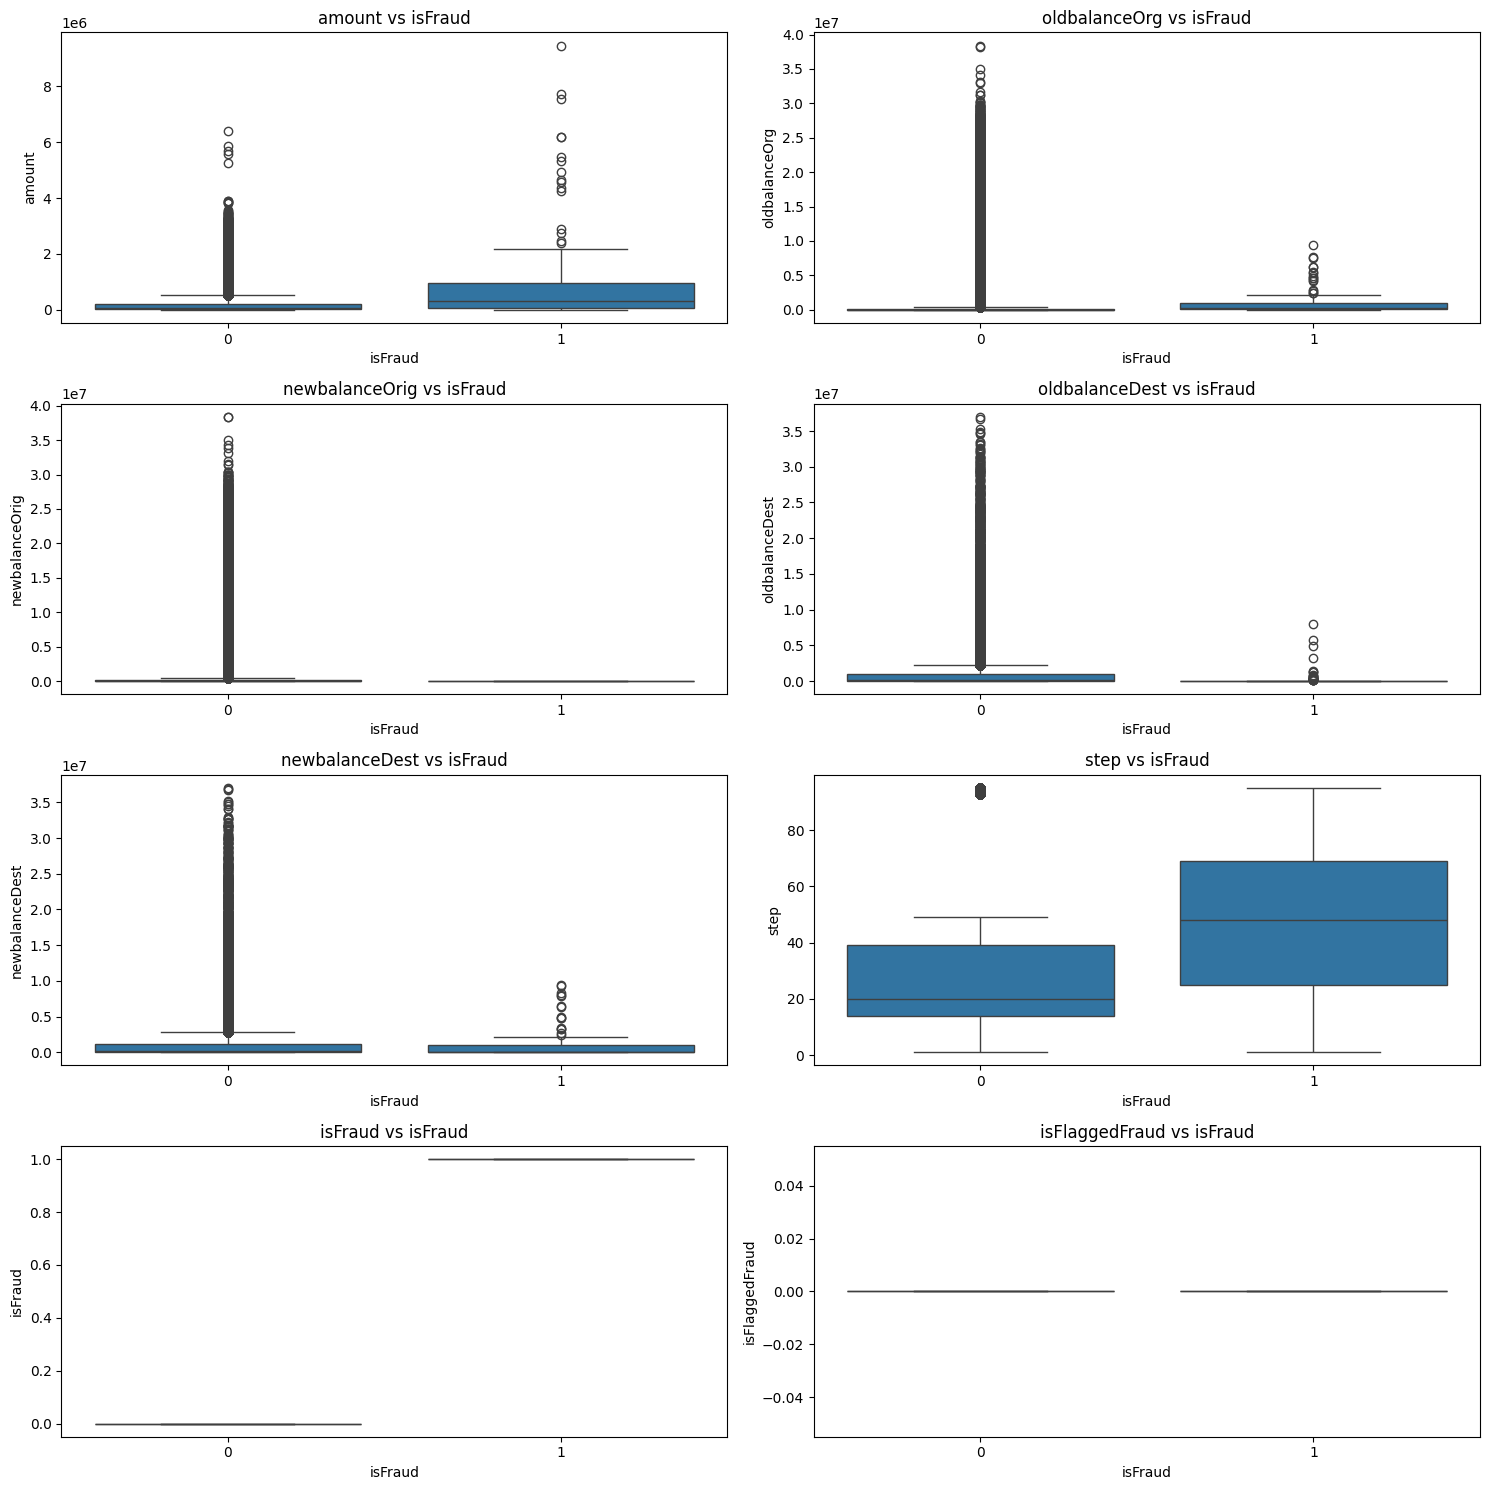

In [ ]:
# Define the numerical and categorical columns
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','step','isFraud','isFlaggedFraud']
categorical_columns = ['type', 'nameDest', 'nameOrig']

# Determine the number of rows and columns for the subplots
n_rows = len(numerical_columns) // 2 + len(numerical_columns) % 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numerical columns and plot against categorical column 'isFraud'
for i, num_col in enumerate(numerical_columns):
    sns.boxplot(x='isFraud', y=num_col, data= df_original, ax=axes[i])
    axes[i].set_title(f'{num_col} vs isFraud')

# Adjust layout
plt.tight_layout()
plt.show()


####**2.4.2Numerical-Numerical Bivariate Visualization**

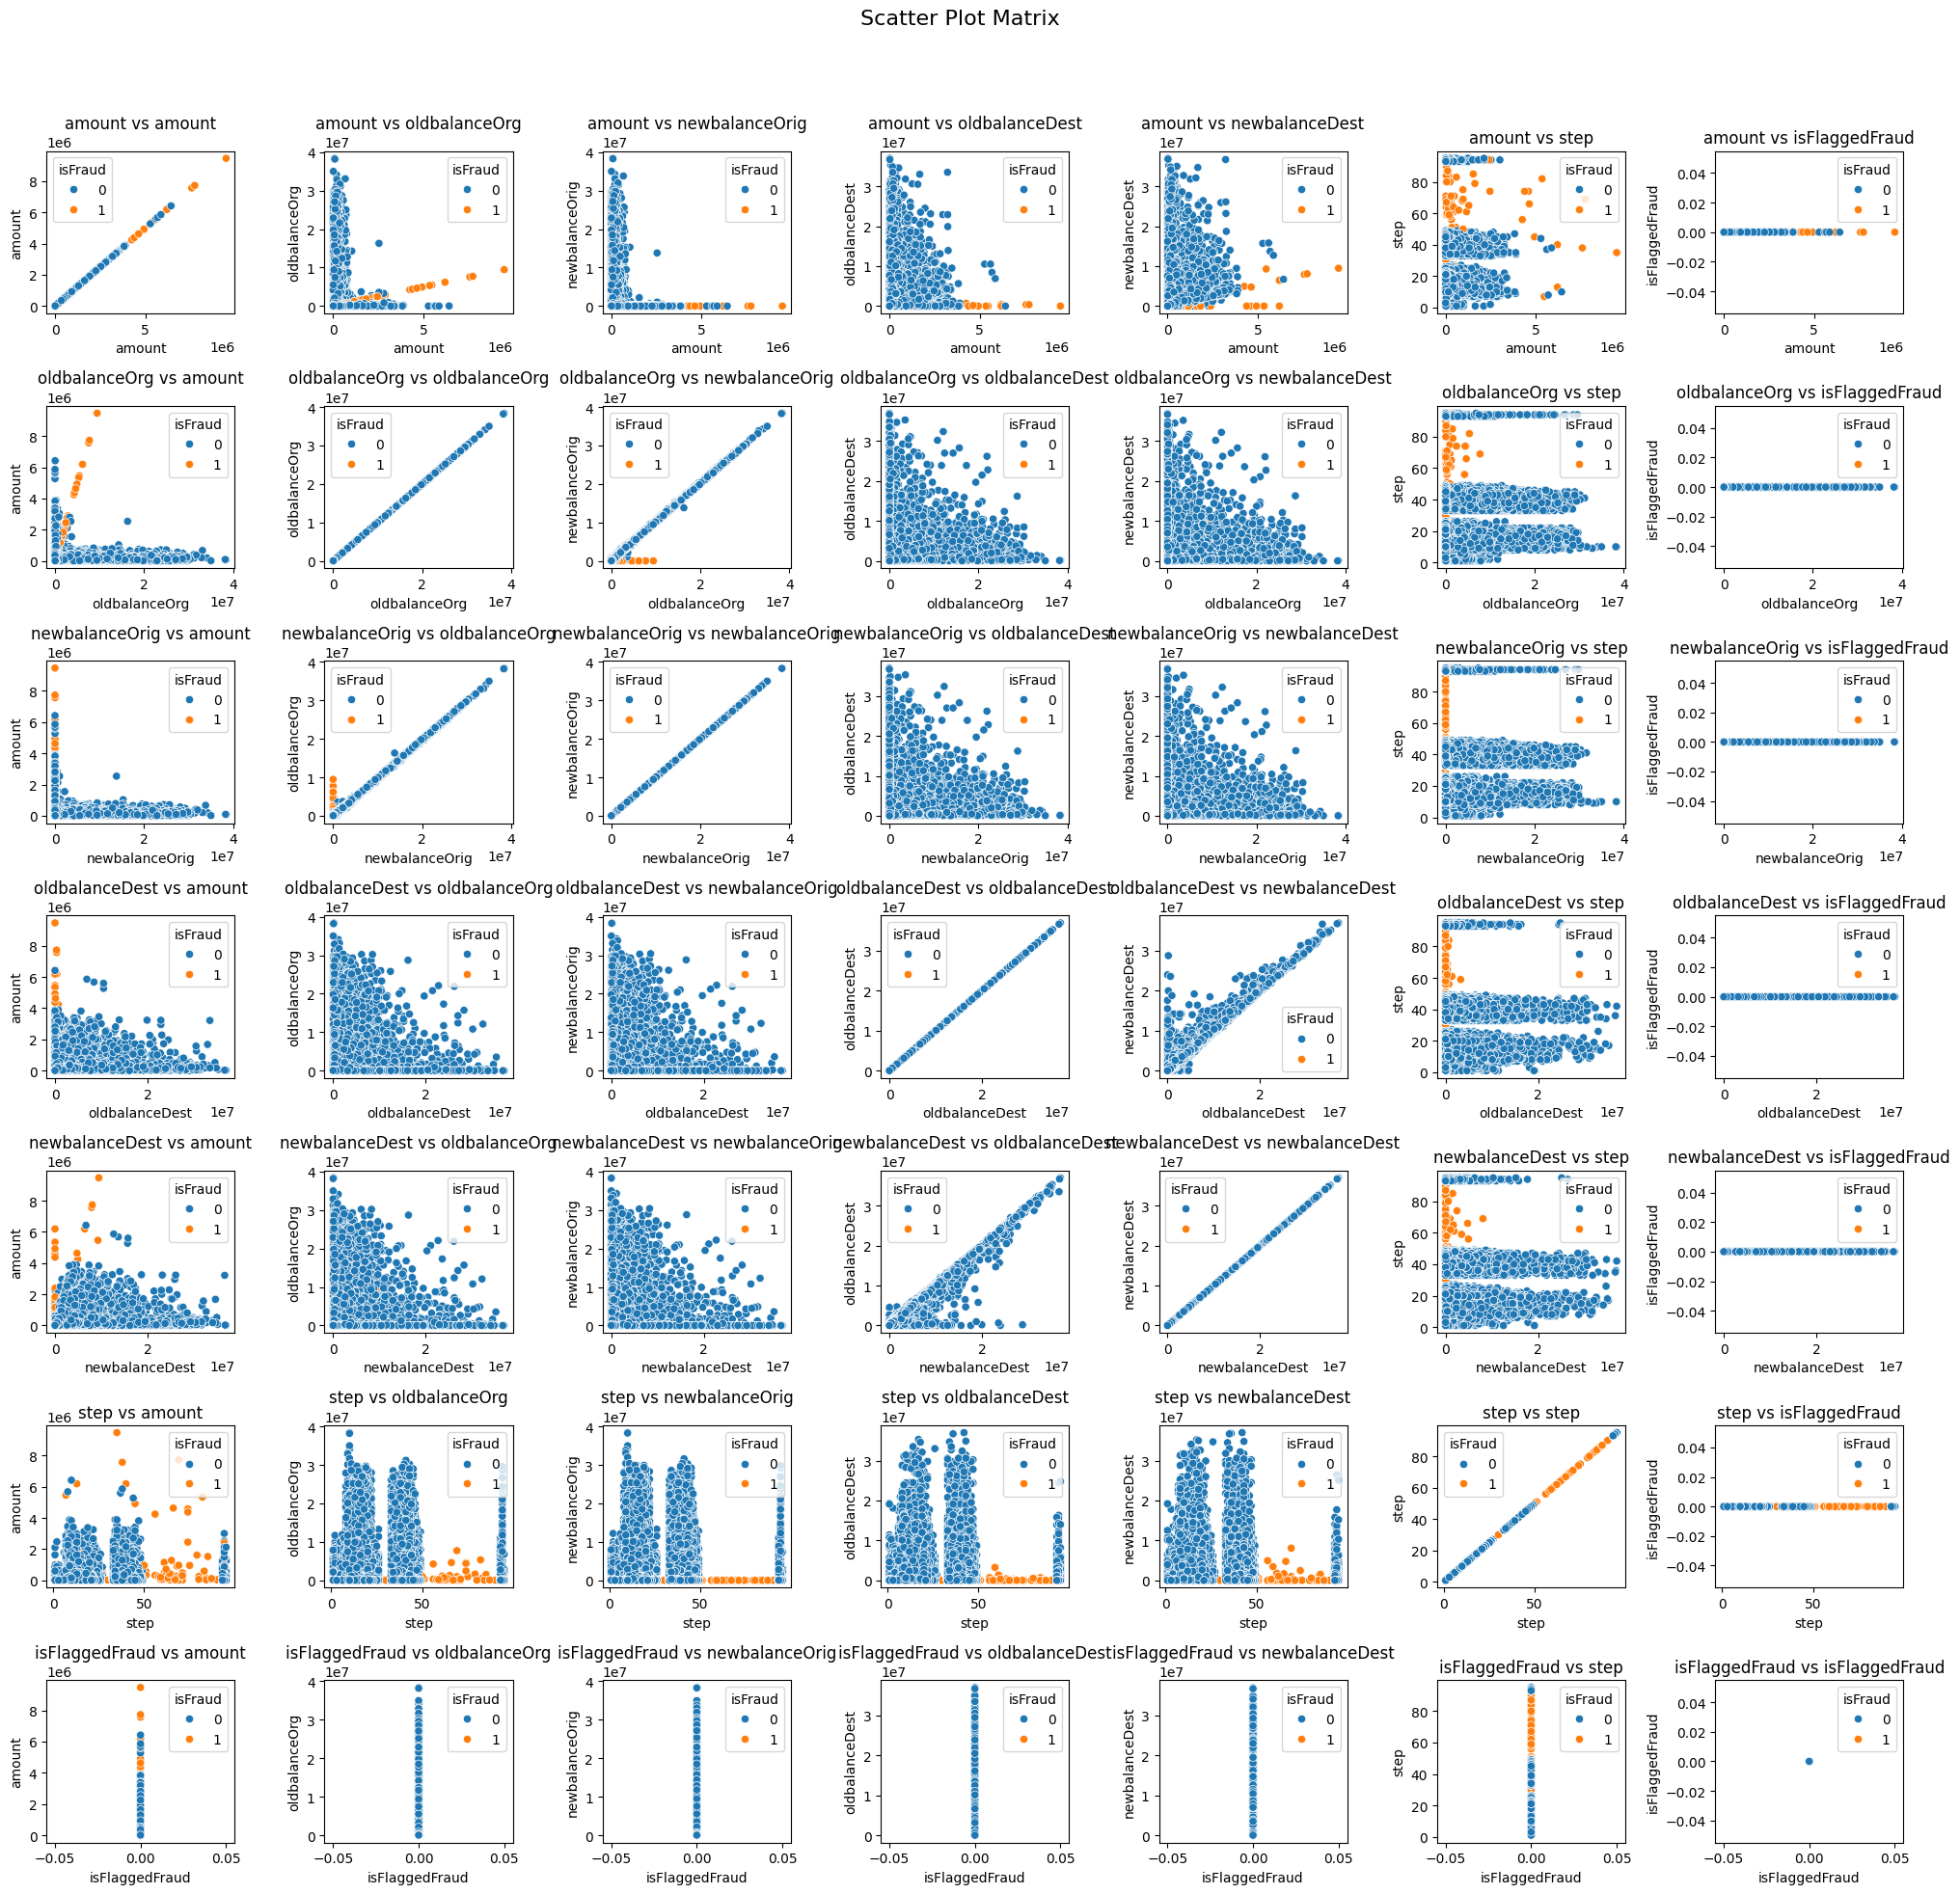

In [ ]:
# Define numerical columns
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'isFlaggedFraud']

# Calculate the number of subplots
n = len(numerical_columns)

# Create subplots for numerical columns
fig, axes = plt.subplots(n, n, figsize=(20, 20))
fig.suptitle('Scatter Plot Matrix', fontsize=16)

for i in range(n):
    for j in range(n):

            sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], hue='isFraud', data=df_original, ax=axes[i, j])
            axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')


# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


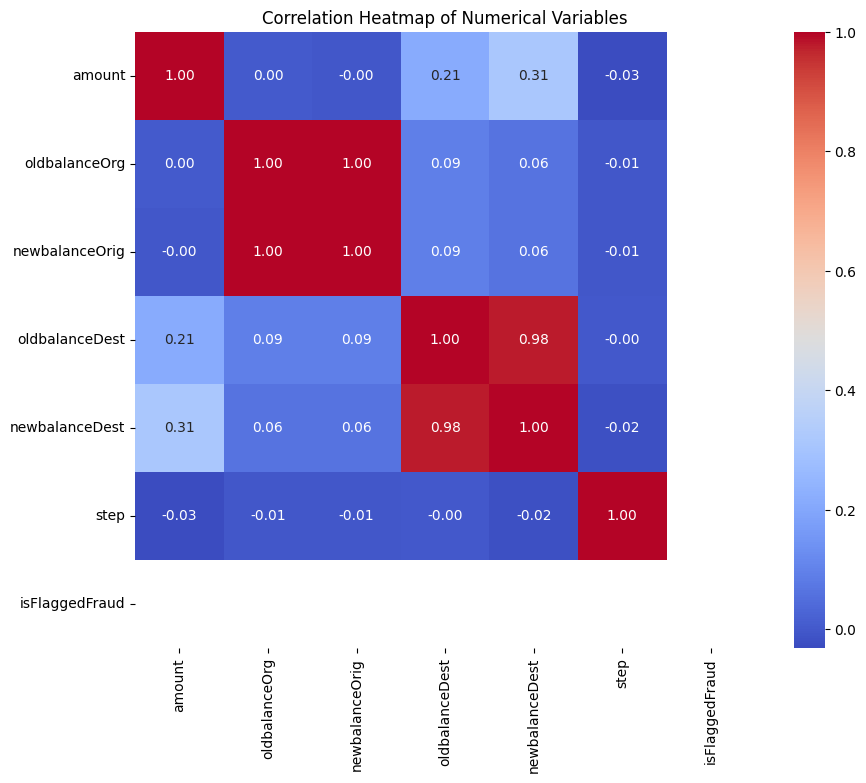

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_original[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

####**2.4.3.Categorical-Categorical Bivariate Visualization**

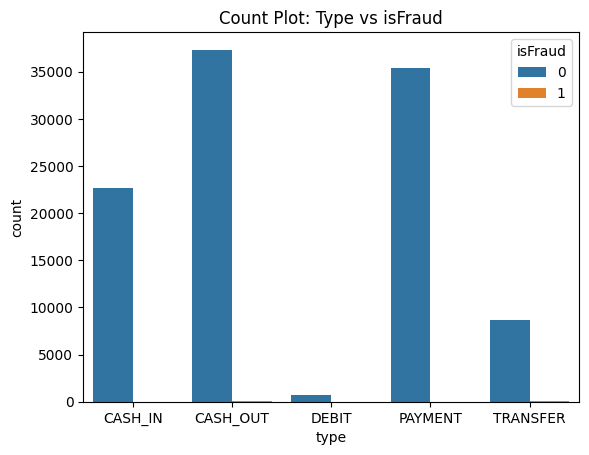

In [ ]:
# Plot countplot for categorical vs categorical
sns.countplot(x='type', hue='isFraud', data=df_original)
plt.title('Count Plot: Type vs isFraud')
plt.show()

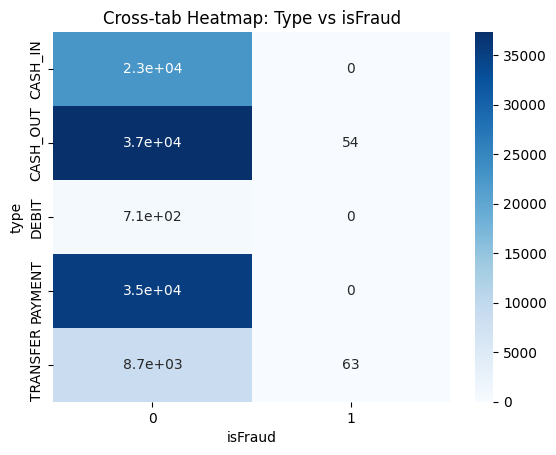

In [ ]:
# Cross-tabulation and heatmap for categorical-categorical relationships
cat_cat_crosstab = pd.crosstab(df_original['type'], df_original['isFraud'])
sns.heatmap(cat_cat_crosstab, annot=True, cmap='Blues')
plt.title('Cross-tab Heatmap: Type vs isFraud')
plt.show()

##**2.5 Multivariate vaiable Analysis**

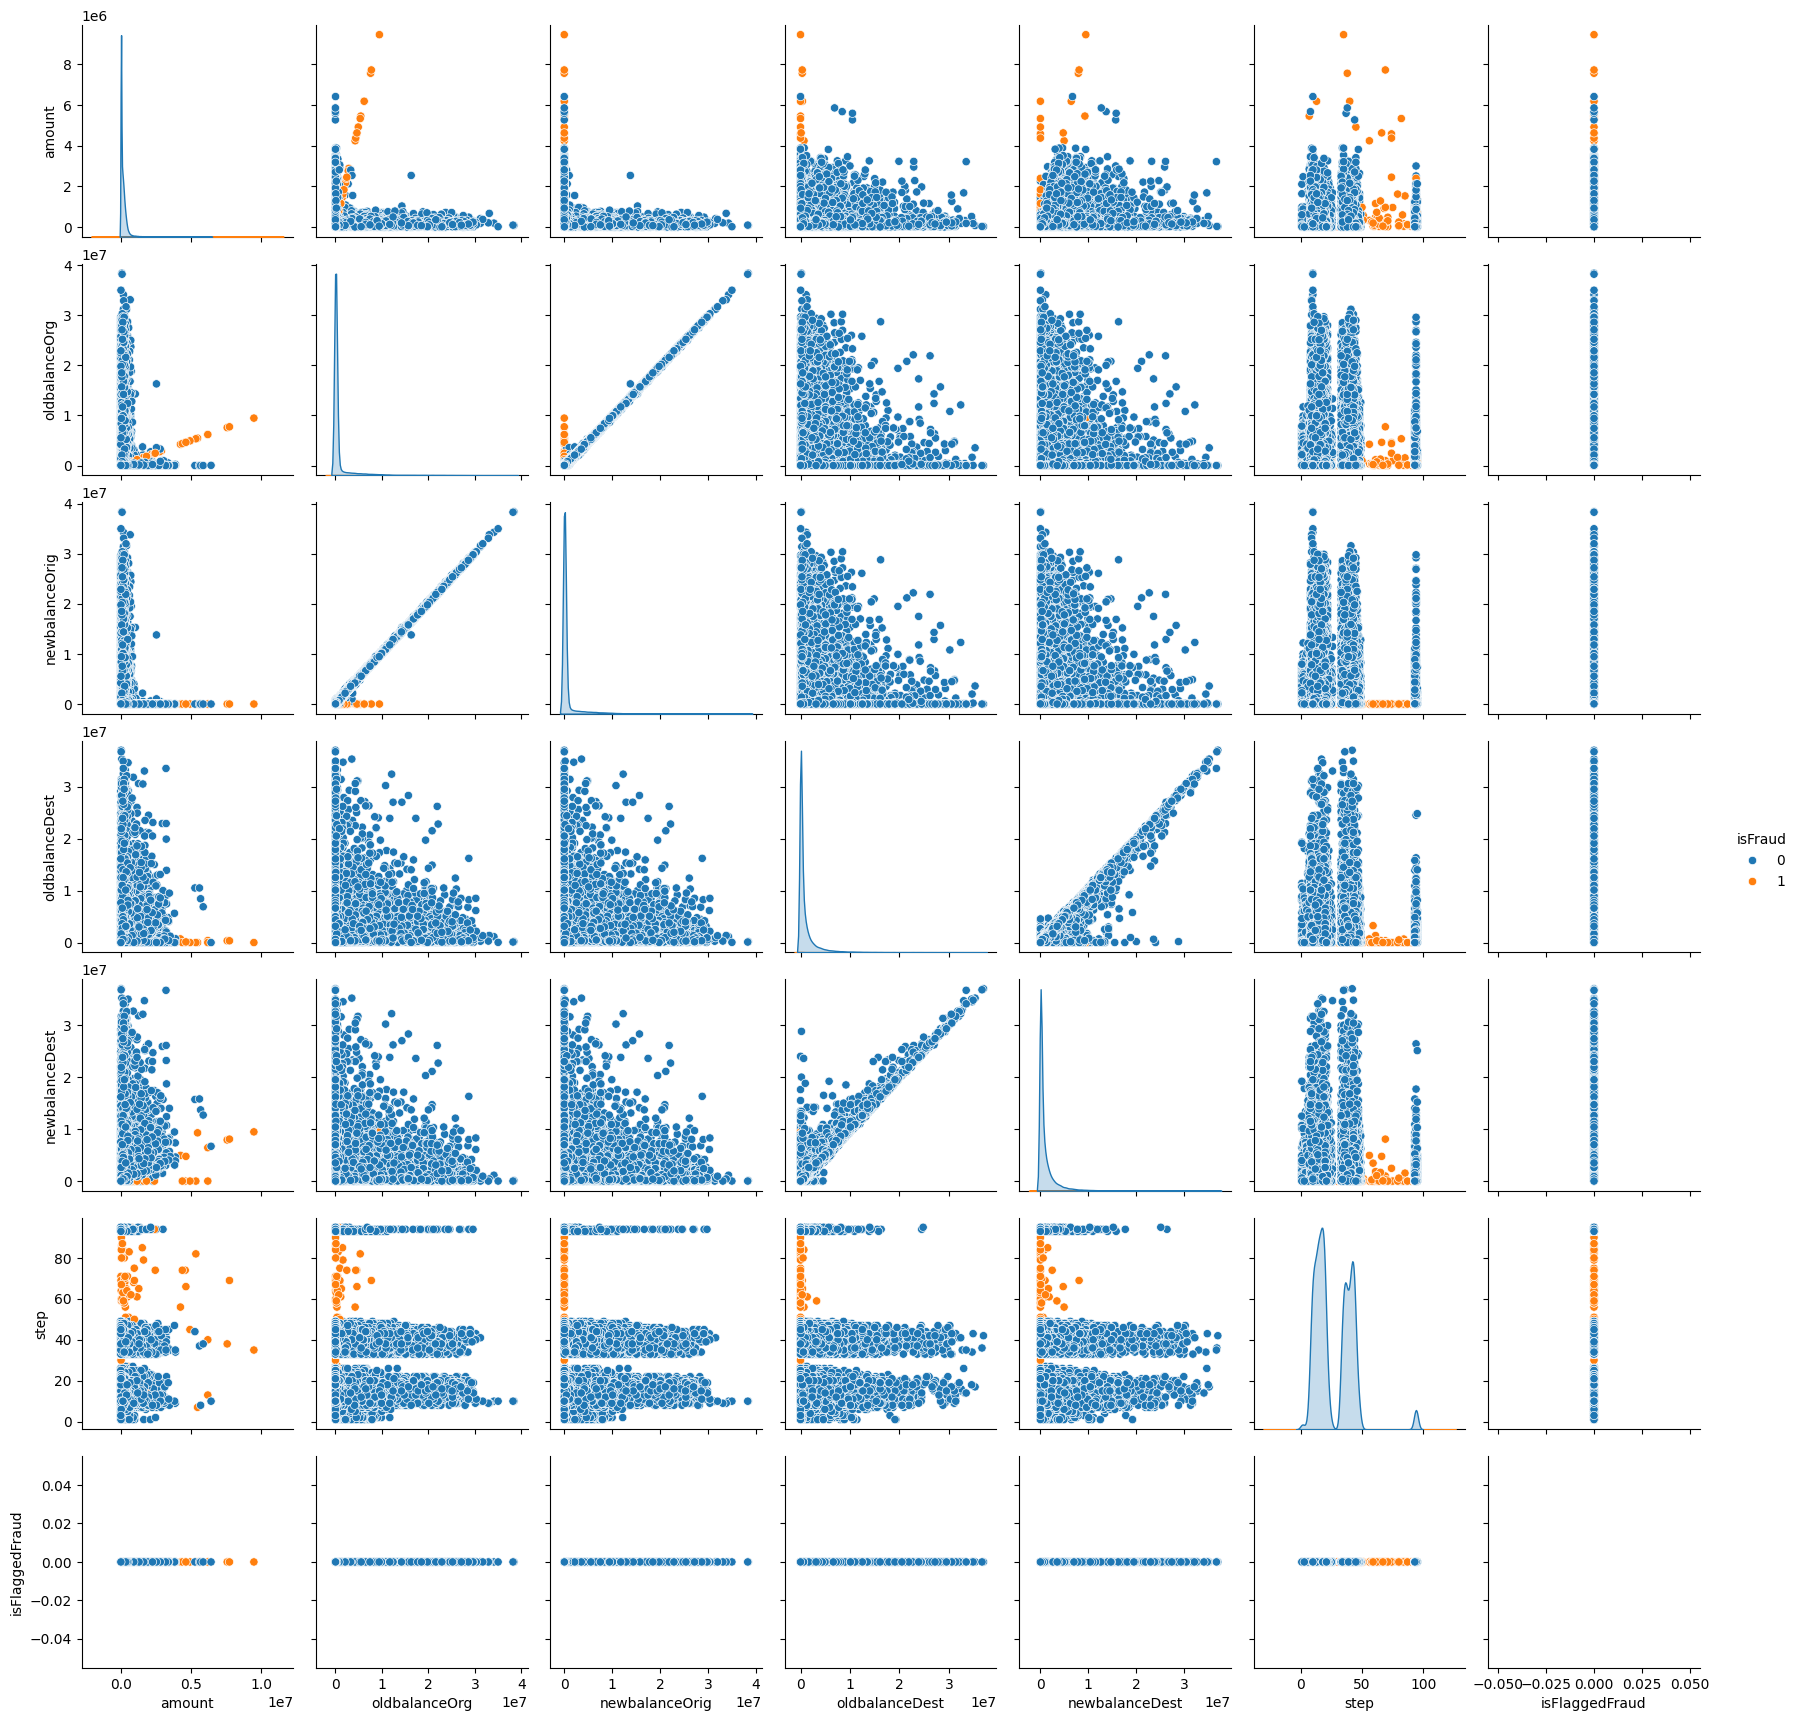

In [ ]:
# Multivariate plot using pairplot for numerical columns colored by 'isFraud'
sns.pairplot(df_original[numerical_columns + ['isFraud']], hue='isFraud')
plt.show()

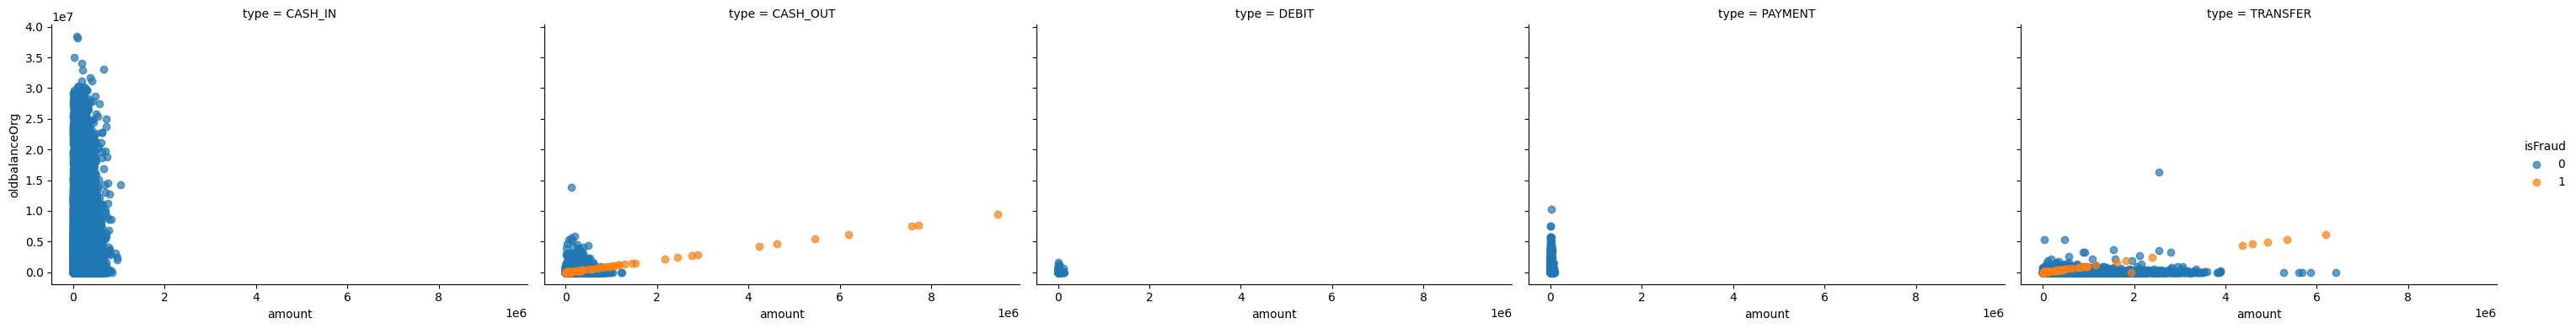

In [ ]:
# FacetGrid for multivariate plot (numerical variables grouped by categorical)
g = sns.FacetGrid(df_original, col="type", hue="isFraud", height=4, aspect=1.5)
g.map(plt.scatter, "amount", "oldbalanceOrg", alpha=.7)
g.add_legend()
plt.show()

#**Step2: Data Preprocessing**

###**2.1Handling Missing Values**


In [ ]:
#To check for missing values
data_fd.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**No missing values**

In [ ]:
#Detecting Outliers
outliers = {}

for col in df_fd_numerical: # Iterate over the Index object directly
    Q1 = np.quantile(df_fd_numerical[col], 0.25)
    Q3 = np.quantile(df_fd_numerical[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_fd_numerical[(df_fd_numerical[col] < lower_bound) | (df_fd_numerical[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in step:
1030601    76
1030602    76
1030603    76
1030604    76
1030605    77
           ..
1048570    95
1048571    95
1048572    95
1048573    95
1048574    95
Name: step, Length: 17974, dtype: int64

Outliers in amount:
85         1505626.01
86          554026.99
88          761507.39
89         1429051.47
93          583848.46
              ...    
1048011    1339844.75
1048027    3572499.78
1048082    2905341.96
1048139    1642975.23
1048468     988558.95
Name: amount, Length: 53088, dtype: float64

Outliers in oldbalanceOrg:
14          503264.00
62          882770.00
63          874042.26
241        6313782.05
242        6309146.87
              ...    
1048254    2261101.82
1048354     598270.00
1048420     374371.00
1048469     631883.00
1048570     479803.00
Name: oldbalanceOrg, Length: 181877, dtype: float64

Outliers in newbalanceOrig:
14          499165.22
62          874042.26
63          871442.79
241        6309146.87
242        6307878.90
              ...   

###**2.2Treating Outliers**

In [ ]:
'''
step: The outliers are treated by clipping extreme values based on a given percentile range (5th and 95th percentiles).
amount: Log-transformed (amount_log) and optionally clipped to reduce the influence of extreme values.
oldbalanceOrg, oldbalanceDest, newbalanceOrig, newbalanceDest: Similar treatment as amount with log transformations and optional clipping.
isFraud: Kept as is (binary feature with no need for outlier treatment).
isFlaggedFraud: No treatment required (no outliers).
'''
# Assuming `df` is your DataFrame containing the data
def clip_outliers_step(df, column, lower_percentile=0.05, upper_percentile=0.95):

    # 1. Treat outliers in 'step' using Winsorization (clipping extreme values)
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower, upper)

    # 2. Apply Log Transformation to 'amount' to reduce the influence of extreme values
    df['amount_log'] = np.log1p(df['amount'])  # log1p is used to handle zero values

    # 3. Apply Log Transformation to balance columns 'oldbalanceOrg' and 'oldbalanceDest'
    df['oldbalanceOrg_log'] = np.log1p(df['oldbalanceOrg'])
    data_fd['oldbalanceDest_log'] = np.log1p(df['oldbalanceDest'])

    # 4. Apply Log Transformation to 'newbalanceOrig' and 'newbalanceDest'
    df['newbalanceOrig_log'] = np.log1p(df['newbalanceOrig'])
    df['newbalanceDest_log'] = np.log1p(df['newbalanceDest'])

    # 5. No changes needed for 'isFraud', it's binary and represents actual fraud cases (keep as is)

    # 6. No changes needed for 'isFlaggedFraud' as it has no significant variation (no outliers)
    return df

# 1. Treat outliers in 'step' using Winsorization (clipping extreme values)
df_original = clip_outliers_step(data_fd, 'step')

In [ ]:
# List of original columns to drop
original_columns = ['amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'newbalanceDest']

# Drop the original columns from the dataframe after log transformation
df_cleaned = data_fd.drop(columns=original_columns, errors='ignore')

# Check the first few rows to verify the changes
df_cleaned.head()

step      type     nameOrig     nameDest  isFraud  isFlaggedFraud  \
0     9   PAYMENT  C1231006815  M1979787155        0               0   
1     9   PAYMENT  C1666544295  M2044282225        0               0   
2     9  TRANSFER  C1305486145   C553264065        1               0   
3     9  CASH_OUT   C840083671    C38997010        1               0   
4     9   PAYMENT  C2048537720  M1230701703        0               0   

   amount_log  oldbalanceOrg_log  oldbalanceDest_log  newbalanceOrig_log  \
0    9.194276          12.044359            0.000000           11.984786   
1    7.531166           9.964112            0.000000            9.872292   
2    5.204007           5.204007            0.000000            0.000000   
3    5.204007           5.204007            9.960954            0.000000   
4    9.364703          10.634773            0.000000           10.305174   

   newbalanceDest_log  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
df_cleaned.dtypes

step                     int64
type                  category
nameOrig              category
nameDest              category
isFraud                  int64
isFlaggedFraud           int64
amount_log             float64
oldbalanceOrg_log      float64
oldbalanceDest_log     float64
newbalanceOrig_log     float64
newbalanceDest_log     float64
dtype: object

In [ ]:
df_cleaned.columns.size

11

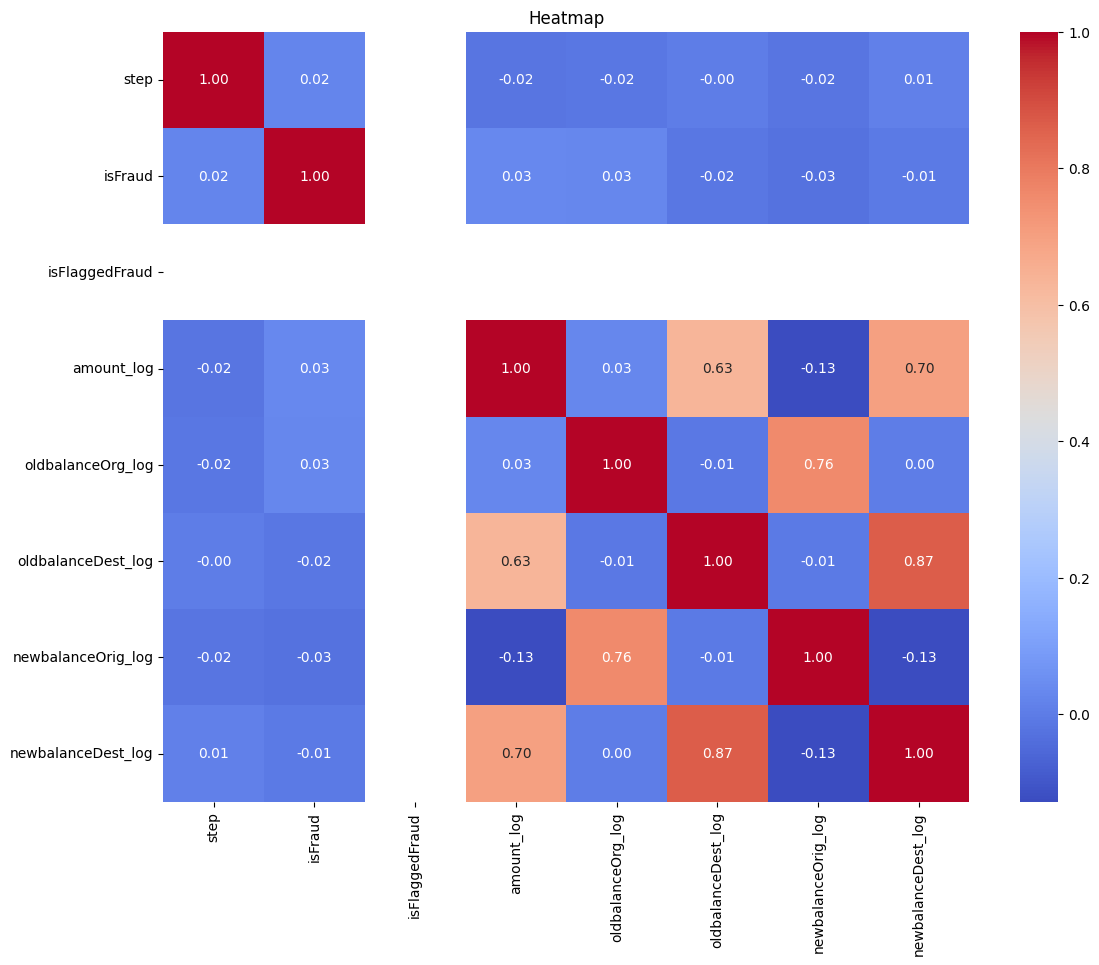

In [ ]:
#Heatmap
df_num = df_cleaned.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(13, 10))
sns.heatmap(df_num.corr(),annot=True,fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

**Strong Correlations:**
- **newbalanceDest_log and oldbalanceDest_log (0.87)**
- **newbalanceOrig_log and oldbalanceOrg_log (0.76)**
- **amount_log and newbalanceDest_log (0.70)**
- **amount_log and oldbalanceDest_log (0.63)**

**Weak Correlations:**
- **step and other variables:** The step variable (representing time) has very weak correlations with all other variables, indicating little to no linear relationship with them.

- **isFraud(target) and other variables**The correlation between isFraud and all other variables is also very weak (around 0.03), which suggests that fraud detection may not be directly linearly related to these variables in their current form. More sophisticated techniques (e.g., non-linear models or feature interactions) might be needed to capture fraud patterns.

**Multicollinearity:**
There is **strong multicollinearity** between **newbalanceDest_log and oldbalanceDest_log (0.87)** and between **newbalanceOrig_log and oldbalanceOrg_log (0.76)**. These variables are highly related because they are part of the same transaction process (before and after balances).

**Variance Inflation Factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

# Display sorted VIF values
vif_data.sort_values(by="VIF", ascending=False)

feature        VIF
7  newbalanceDest_log  12.648210
5  oldbalanceDest_log  10.949219
3          amount_log  10.262952
4   oldbalanceOrg_log   7.577682
6  newbalanceOrig_log   5.069958
0                step   4.640969
1             isFraud   1.008670
2      isFlaggedFraud        NaN

Address issue: Can remove highly correlated features. For instance, since **newbalanceDest_log and oldbalanceDest_log** are highly correlated, can drop one of them or we an use **Principal Component Analysis (PCA)**

##**2.3 One - Hot Encoding Categorical variables**

In [ ]:
# Select only categorical features for encoding
categorical_features = df_cleaned.select_dtypes(include=['category']).columns

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_features:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [ ]:
df_cleaned.head()

step  type  nameOrig  nameDest  isFraud  isFlaggedFraud  amount_log  \
0     9     3    125164    274917        0               0    9.194276   
1     9     3    361319    286716        0               0    7.531166   
2     9     4    165236     73550        1               0    5.204007   
3     9     1    961662     65464        1               0    5.204007   
4     9     3    567915    138001        0               0    9.364703   

   oldbalanceOrg_log  oldbalanceDest_log  newbalanceOrig_log  \
0          12.044359            0.000000           11.984786   
1           9.964112            0.000000            9.872292   
2           5.204007            0.000000            0.000000   
3           5.204007            9.960954            0.000000   
4          10.634773            0.000000           10.305174   

   newbalanceDest_log  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
df_cleaned.dtypes

step                    int64
type                    int64
nameOrig                int64
nameDest                int64
isFraud                 int64
isFlaggedFraud          int64
amount_log            float64
oldbalanceOrg_log     float64
oldbalanceDest_log    float64
newbalanceOrig_log    float64
newbalanceDest_log    float64
dtype: object

In [ ]:
df_cleaned.columns.size

11

##**2.4 Normalization or Scaling variables**





In [ ]:
from sklearn.preprocessing import StandardScaler

# Check the actual column names in your DataFrame
print(df_cleaned.columns)  # Print the columns to see what they are.

# Assuming the column names are correct (case-sensitive)
scaler = StandardScaler()

# Get the actual numerical column names from your DataFrame
numerical_features = df_cleaned.select_dtypes(include=['number']).columns.tolist()

# Remove 'isFlaggedFraud' if it's not a numerical feature in your data
if 'isFlaggedFraud' in numerical_features and df_cleaned['isFlaggedFraud'].dtype != 'number':
    numerical_features.remove('isFlaggedFraud')

# Proceed to fit_transform the data
scaled_data = scaler.fit_transform(df_cleaned[numerical_features])

# Create a new DataFrame to store the scaled values
df_scaled = pd.DataFrame(scaled_data, columns=numerical_features, index=df_cleaned.index)


Index(['step', 'type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud',
       'amount_log', 'oldbalanceOrg_log', 'oldbalanceDest_log',
       'newbalanceOrig_log', 'newbalanceDest_log'],
      dtype='object')


In [ ]:
# Print the scaled DataFrame
df_scaled.head()

step      type  nameOrig  nameDest    isFraud  amount_log  \
0 -1.326196  0.956576 -1.318453  1.220674  -0.033019   -0.878647   
1 -1.326196  0.956576 -0.538096  1.315994  -0.033019   -1.783958   
2 -1.326196  1.700067 -1.186038 -0.406106  30.285174   -3.050744   
3 -1.326196 -0.530406  1.445694 -0.471430  30.285174   -3.050744   
4 -1.326196  0.956576  0.144586  0.114573  -0.033019   -0.785876   

   oldbalanceOrg_log  oldbalanceDest_log  newbalanceOrig_log  \
0           0.788938           -1.160703            1.006134   
1           0.424424           -1.160703            0.675045   
2          -0.409669           -1.160703           -0.872226   
3          -0.409669            0.328518           -0.872226   
4           0.541942           -1.160703            0.742890   

   newbalanceDest_log  
0           -1.236791  
1           -1.236791  
2           -1.236791  
3           -1.236791  
4           -1.236791

In [ ]:
df_scaled.columns.size

10

##**2.5 Feature Engineering**



In [ ]:
# 4. Feature Engineering
# Create new features before applying PCA
# Check if the column name is correct or exists
#  # Print the available columns in df_resampled

# If the column name is incorrect, correct it. If it's missing,
# investigate why it was dropped in the previous steps and adjust accordingly.

# Assuming the column name is 'oldbalanceOrg', the code should work:
df_scaled['old_new_balance_ratio'] = df_scaled['oldbalanceOrg_log'] / df_scaled['newbalanceOrig_log']
df_scaled['balanceChangeOrig'] = df_scaled['newbalanceOrig_log'] - df_scaled['oldbalanceOrg_log']
df_scaled['balanceRatioOrig'] = df_scaled['newbalanceOrig_log'] / df_scaled['oldbalanceOrg_log']

In [ ]:
df_scaled.head()

step      type  nameOrig  nameDest    isFraud  amount_log  \
0 -1.326196  0.956576 -1.318453  1.220674  -0.033019   -0.878647   
1 -1.326196  0.956576 -0.538096  1.315994  -0.033019   -1.783958   
2 -1.326196  1.700067 -1.186038 -0.406106  30.285174   -3.050744   
3 -1.326196 -0.530406  1.445694 -0.471430  30.285174   -3.050744   
4 -1.326196  0.956576  0.144586  0.114573  -0.033019   -0.785876   

   oldbalanceOrg_log  oldbalanceDest_log  newbalanceOrig_log  \
0           0.788938           -1.160703            1.006134   
1           0.424424           -1.160703            0.675045   
2          -0.409669           -1.160703           -0.872226   
3          -0.409669            0.328518           -0.872226   
4           0.541942           -1.160703            0.742890   

   newbalanceDest_log  old_new_balance_ratio  balanceChangeOrig  \
0           -1.236791               0.784128           0.217196   
1           -1.236791               0.628735           0.250621   
2           -1.236791               0.469683          -0.462557   
3           -1.236791               0.469683          -0.462557   
4           -1.236791               0.729504           0.200949   

   balanceRatioOrig  
0          1.275302  
1          1.590496  
2          2.129098  
3          2.129098  
4          1.370794

In [ ]:
df_scaled.columns.size

13

##**2.6 PCA**


In [ ]:
#To address mullticollinerity issues
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Adjust to retain 95% of the variance
principal_components = pca.fit_transform(df_scaled)


In [ ]:
df_scaled.shape

(1048575, 13)

##**2.7 SMOTE(Addressing issue of imbalance dataset)**


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define features and target
X_ind = df_scaled.drop('isFraud', axis=1)  # Features
y_dep = df_scaled['isFraud']  # Target

# Convert the target variable to binary (0/1)
# Assuming values greater than 0 are considered fraud (1)
y_dep = (y_dep > 0).astype(int)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_ind, y_dep)

# Convert back to DataFrame for further analysis
df_resampled = pd.DataFrame(X_resampled, columns=X_ind.columns)
df_resampled['isFraud'] = y_resampled


print("\nResampled Class Distribution:")
print(df_resampled['isFraud'].value_counts())


Resampled Class Distribution:
isFraud
0    1047433
1    1047433
Name: count, dtype: int64


In [ ]:
#shape
df_resampled.shape, df_cleaned.shape

((2094866, 13), (1048575, 11))

In [ ]:
#first few rows
df_resampled.head()

step      type  nameOrig  nameDest  amount_log  oldbalanceOrg_log  \
0 -1.326196  0.956576 -1.318453  1.220674   -0.878647           0.788938   
1 -1.326196  0.956576 -0.538096  1.315994   -1.783958           0.424424   
2 -1.326196  1.700067 -1.186038 -0.406106   -3.050744          -0.409669   
3 -1.326196 -0.530406  1.445694 -0.471430   -3.050744          -0.409669   
4 -1.326196  0.956576  0.144586  0.114573   -0.785876           0.541942   

   oldbalanceDest_log  newbalanceOrig_log  newbalanceDest_log  \
0           -1.160703            1.006134           -1.236791   
1           -1.160703            0.675045           -1.236791   
2           -1.160703           -0.872226           -1.236791   
3            0.328518           -0.872226           -1.236791   
4           -1.160703            0.742890           -1.236791   

   old_new_balance_ratio  balanceChangeOrig  balanceRatioOrig  isFraud  
0               0.784128           0.217196          1.275302        0  
1               0.628735           0.250621          1.590496        0  
2               0.469683          -0.462557          2.129098        1  
3               0.469683          -0.462557          2.129098        1  
4               0.729504           0.200949          1.370794        0

#**Inference from EDA:**

**Feature Relevance:**

**Important Features for Fraud Detection:**
- The **amount_log, oldbalanceOrg_log, newbalanceOrig_log, and newbalanceDest_log** features stand out as important because of their moderate-to-strong correlations with each other and their apparent separation between fraudulent and non-fraudulent transactions in the pairplot.
- **step and isFlaggedFraud** do not show significant patterns or correlations and might not be as useful for predicting fraud.

**Transaction Patterns:**
- Fraudulent transactions tend to cluster around zero balances, whereas non-fraudulent transactions show more predictable patterns where balances update in a way that corresponds to the transaction amount.
- There are distinct outlier behaviors for fraudulent transactions, which might help build classification models to detect fraud more effectively.

#**Step4: Model Building**

##**4.1Prepare Target and Features:**

In [ ]:
# Define features (X) and target (y) from the resampled dataset
X_resampled = df_resampled.drop(['isFraud','oldbalanceDest_log'], axis=1)# Removed variable OldbalaneDest-log to address multiollinearity issue
y_resampled = df_resampled['isFraud']


##**4.2Split the Data into Training and Testing Sets:**

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_ind, y_dep, test_size=0.2, random_state=42)

**Size Reduced : Sample_size (Half)**

In [ ]:
#Size of dataset reduced to speed up the work
# Assuming X_train and y_train are your features and target
sample_size = 50000  # Desired sample size

# Create indices for training data
train_indices = np.random.choice(len(X_train), sample_size, replace=False)
X_train = X_train.iloc[train_indices]
y_train = y_train.iloc[train_indices]

# Create indices for test data (ensure it's within the bounds of X_test)
test_indices = np.random.choice(len(X_test), min(sample_size, len(X_test)), replace=False) # Use min to avoid exceeding X_test size
X_test = X_test.iloc[test_indices]
y_test = y_test.iloc[test_indices]

In [ ]:
'''#Size of dataset reduced to speed up the work
# Assuming X_train and y_train are your features and target
sample_size = 50000  # Desired sample size

# Create indices for training data
train_indices1 = np.random.choice(len(X_train_org), sample_size, replace=False)
X_train_org = X_train_org.iloc[train_indices1]
y_train_org = y_train_org.iloc[train_indices1]

# Create indices for test data (ensure it's within the bounds of X_test)
test_indices1 = np.random.choice(len(X_test_org), min(sample_size, len(X_test_org)), replace=False) # Use min to avoid exceeding X_test size
X_test_org = X_test.iloc[test_indices1]
y_test_org = y_test.iloc[test_indices1]'''

In [ ]:
'''#Define a Batch Generator:
def batch_generator(X, y, batch_size):
    for start in range(0, len(X), batch_size):
        end = min(start + batch_size, len(X))
        yield X[start:end], y[start:end]

batch_size = 50000  # Set your batch size
n_epochs = 10  # Number of epochs

#Training Loop with Batches:
for epoch in range(n_epochs):
    for X_batch, y_batch in batch_generator(X_resampled, y_resampled, batch_size):
        # Fit your model on the current batch
        model.fit(X_batch, y_batch)''''


In [ ]:
# Check the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 11) (50000, 11) (50000,) (50000,)


##**4.3 Model Fitting, Training and Evaluation**




###**4.3.1 Simple Models (Logistic Regression, Random Forest, Decision Tree Classifiers)**

In [ ]:
#creating the objects of the models
logreg_cv = LogisticRegression(random_state=42, max_iter=1000,class_weight='balanced')
# Fit the model to the training data
logreg_cv.fit(X_train, y_train)
# Make predictions on the training and test sets
y_train_pred = logreg_cv.predict(X_train)
y_test_pred = logreg_cv.predict(X_test)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# Assuming 'logreg_cv' is your trained logistic regression model
y_pred_proba = logreg_cv.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Now calculate ROC AUC using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)

# The rest of your code remains the same
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)



# Print results
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.9217
Test Accuracy: 0.9209
ROC AUC: 0.972743287967664
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     24979
           1       0.89      0.96      0.92     25021

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000

Confusion Matrix:
[[21983  2996]
 [  959 24062]]


In [ ]:
dt_cv=DecisionTreeClassifier(random_state=42,class_weight='balanced')
# Fit the model to the training data
dt_cv.fit(X_train, y_train)
# Make predictions on the training and test sets
y_train_pred = dt_cv.predict(X_train)
y_test_pred = dt_cv.predict(X_test)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Assuming 'dt_cv' is your trained random forest model
y_pred_proba = dt_cv.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Now calculate ROC AUC using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)

# The rest of your code remains the same
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 1.0000
Test Accuracy: 0.9910
ROC AUC: 0.9910386496768713
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24979
           1       0.99      0.99      0.99     25021

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000

Confusion Matrix:
[[24715   264]
 [  184 24837]]


In [ ]:
rand_class = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
# Fit the model to the training data
rand_class.fit(X_train, y_train)
# Make predictions on the training and test sets
y_train_pred = rand_class.predict(X_train)
y_test_pred = rand_class.predict(X_test)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
# Assuming 'rand_class' is your trained random forest classifier model
y_pred_proba = rand_class.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Now calculate ROC AUC using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)

# The rest of your code remains the same
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print results
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 1.0000
Test Accuracy: 0.9943
ROC AUC: 0.9998229766750923
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24979
           1       0.99      1.00      0.99     25021

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000

Confusion Matrix:
[[24804   175]
 [  108 24913]]


###**4.3.2 Advanced Models (XGBoost, LightGBM Classifiers)**

In [ ]:
xgm_class =  XGBClassifier(random_state=42,eval_metric='logloss')
# Fit the model to the training data
xgm_class.fit(X_train, y_train)
# Make predictions on the training and test sets
y_train_pred = xgm_class.predict(X_train)
y_test_pred = xgm_class.predict(X_test)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Assuming 'xgm_class' is your trained XGBoost classifier model
y_pred_proba = rand_class.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Now calculate ROC AUC using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)

# The rest of your code remains the same
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print results
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.9997
Test Accuracy: 0.9959
ROC AUC: 0.9998229766750923
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24979
           1       0.99      1.00      1.00     25021

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Confusion Matrix:
[[24839   140]
 [   63 24958]]


In [ ]:
lbm_class =  LGBMClassifier(random_state=42)
# Fit the model to the training data
lbm_class.fit(X_train, y_train)
# Make predictions on the training and test sets
y_train_pred = lbm_class.predict(X_train)
y_test_pred = lbm_class.predict(X_test)
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Assuming 'lbm_class' is your trained LightGBM model
y_pred_proba = lbm_class.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Now calculate ROC AUC using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)

# The rest of your code remains the same
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print results
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

[LightGBM] [Info] Number of positive: 25032, number of negative: 24968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500640 -> initscore=0.002560
[LightGBM] [Info] Start training from score 0.002560
Training Accuracy: 0.9985
Test Accuracy: 0.9953
ROC AUC: 0.9998186222720199
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24979
           1       0.99      1.00      1.00     25021

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Confusion Matrix:


###**4.3.3 Deep Neural Models (Feed Forward neural network)**

In [ ]:

# Build Neural Network model(LSTM)
fnn_neural = Sequential()
fnn_neural.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
fnn_neural.add(Dense(32, activation='relu'))
fnn_neural.add(Dense(1, activation='sigmoid'))

# Compile the model
fnn_neural.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fnn_neural.fit(X_train,y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# Assuming 'lbm_class' is your trained neural network (LSTM) model
# Use predict to get probabilities and extract the probabilities for the positive class
y_pred_proba = fnn_neural.predict(X_test)  # Get prediction probabilities
y_pred_proba = y_pred_proba.flatten() # Flatten the array to 1-D

# Now calculate ROC AUC using predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Get predicted classes (0 or 1) using a threshold (e.g., 0.5)
y_test_pred = (y_pred_proba > 0.5).astype(int)


# The rest of your code remains the same
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print results
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9028 - loss: 0.2652 - val_accuracy: 0.9652 - val_loss: 0.1459
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9699 - loss: 0.1038 - val_accuracy: 0.9774 - val_loss: 0.0783
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9756 - loss: 0.0962 - val_accuracy: 0.9798 - val_loss: 0.0779
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9786 - loss: 0.0794 - val_accuracy: 0.9802 - val_loss: 0.0664
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9805 - loss: 0.0693 - val_accuracy: 0.9821 - val_loss: 0.0564
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9827 - loss: 0.0579 - val_accuracy: 0.9810 - val_loss: 0.0566
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9835 - loss: 0.0491 - val_accuracy: 0.9844 - val_loss: 0.0635
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9838 - loss: 0.0597 - val_accuracy: 0.

In [ ]:
#3 model lists
simple_models = [logreg_cv,dt_cv,rand_class]
advanced_models = [xgm_class,lbm_class]
deep_network_models = [fnn_neural]

###**Insight:**
- LightGBM and XGBoost models are the top performers, achieving near-perfect scores across all evaluation metrics, making them highly reliable for fraud detection.
- FNN also performs very well, indicating the neural network captures complex relationships in the data.
- Traditional models like Logistic Regression underperform, especially in recall, indicating a limitation in detecting fraudulent cases effectively.

#**Step5: Model Evaluation**

In [ ]:
# Define a function to fit and evaluate multiple models
def evaluate_func(model,X_train, X_test, y_train, y_test):


    # Dictionary to store the results
    results = {}

    # Fit each model and evaluate
    for model in model:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        print(f"Model:{model}")
        #Classification report
        print('\n',classification_report(y_test, y_pred))

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Create a heatmap for the confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix:')
        plt.show()

        # Create and display the ROC AUC plot
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.figure(figsize=(5,5))  #
            plt.plot(fpr, tpr, label=f'AUC: {roc_auc:.4f}', color='royalblue', lw=2)  # Custom color
            plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.grid(True)  # Add grid lines
            plt.legend()
            plt.show()
        print('\n') # Moved this line inside the for loop


    # Return the results for all models
    return results



**1.Logistic Regression,Decision Tree and Random Forest**

Model:LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

               precision    recall  f1-score   support

           0       0.96      0.88      0.92     24979
           1       0.89      0.96      0.92     25021

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000



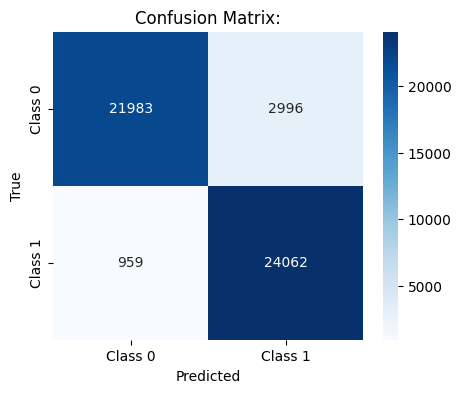

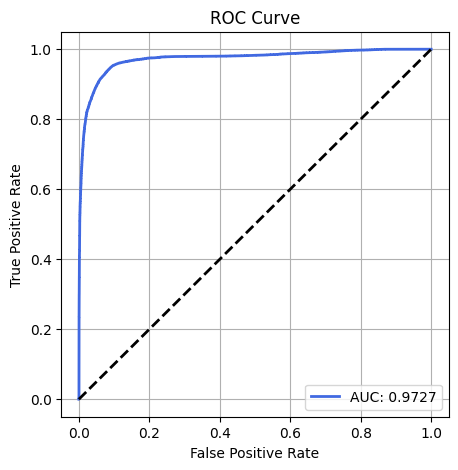



Model:DecisionTreeClassifier(class_weight='balanced', random_state=42)

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     24979
           1       0.99      0.99      0.99     25021

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



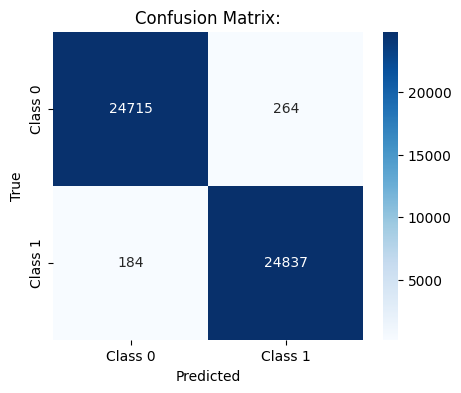

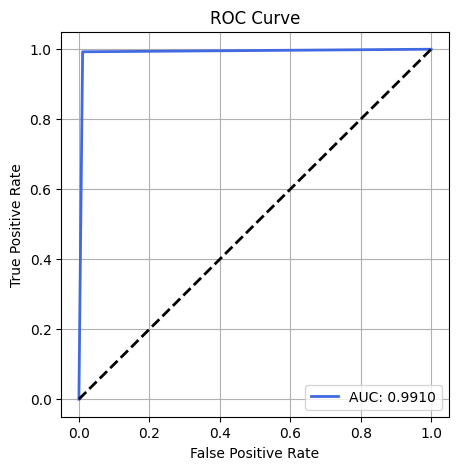



Model:RandomForestClassifier(class_weight='balanced', random_state=42)

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     24979
           1       0.99      1.00      0.99     25021

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



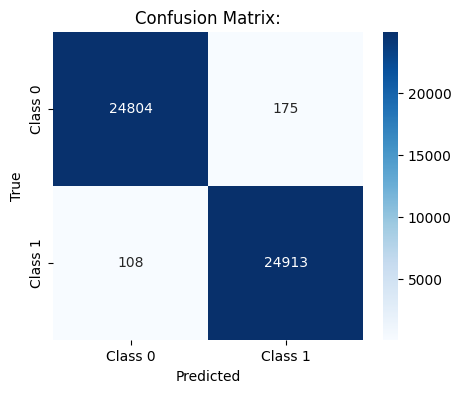

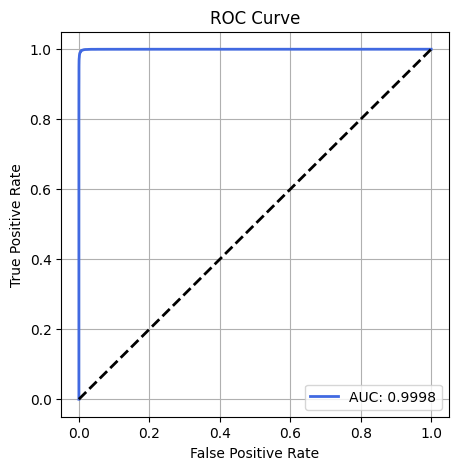

In [ ]:
# Now call the function for Model1
results1 = evaluate_func(simple_models ,X_train, X_test, y_train, y_test)
#(taking too much time)

**2.XGB Classifier and LightGBM Classifier**

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     24979
           1       0.99      1.00      1.00     25021

    accuracy                           1.00     50000
   macro avg 

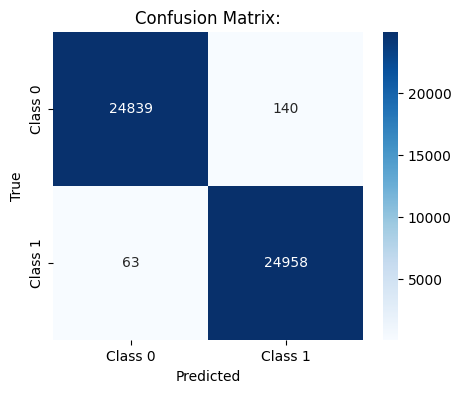

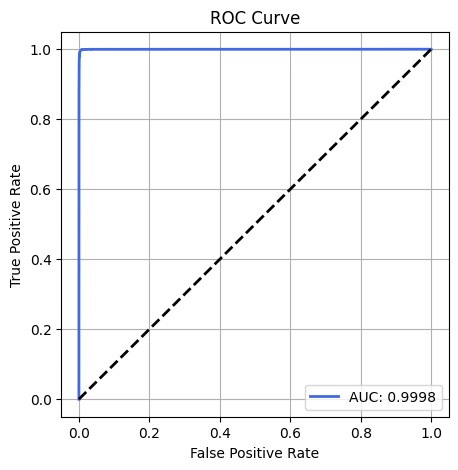



[LightGBM] [Info] Number of positive: 25032, number of negative: 24968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500640 -> initscore=0.002560
[LightGBM] [Info] Start training from score 0.002560
Model:LGBMClassifier(random_state=42)

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     24979
           1       0.99      1.00      1.00     25021

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



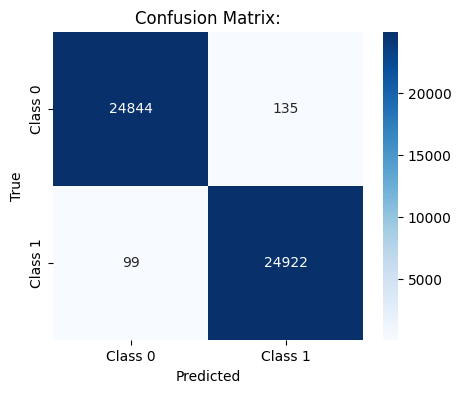

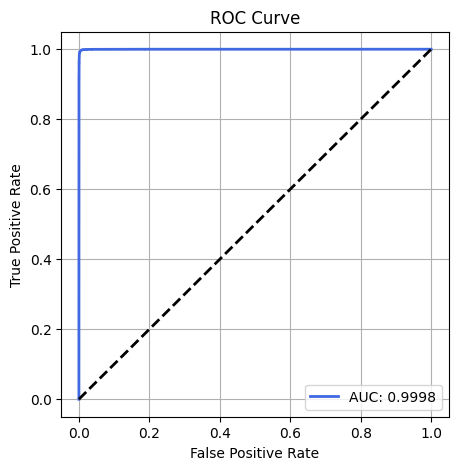

In [ ]:
# Now call the function for Model2
results2 = evaluate_func(advanced_models,X_train.values, X_test.values, y_train.values, y_test.values)

**3.Deep Neural network**

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0465
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Model:<Sequential name=sequential, built=True>

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     24979
         1.0       0.99      0.98      0.99     25021

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



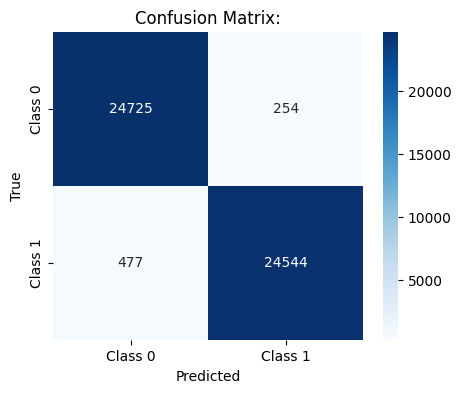

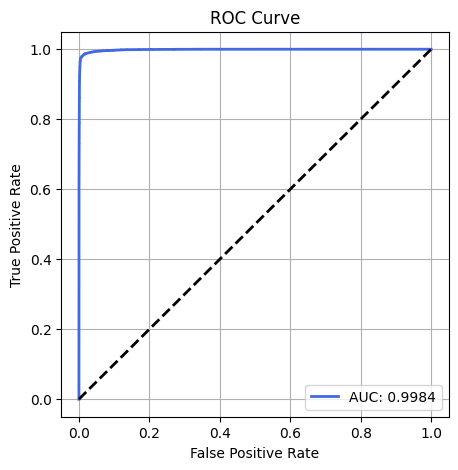

In [ ]:
#convert input data to NumPy arrays with explicit shapes and float32 type outside the loop
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

for model in deep_network_models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_prob = model.predict(X_test) # Assuming your model can predict probabilities

    # Convert predictions to binary using a threshold (e.g., 0.5)
    y_pred_binary = (y_pred > 0.5).astype(int) #Converting continuous to binary

    # Calculate evaluation metrics using the binary predictions
    accuracy = accuracy_score(y_test, y_pred_binary) #Updated Line
    precision = precision_score(y_test, y_pred_binary) #Updated Line
    recall = recall_score(y_test, y_pred_binary) #Updated Line
    f1 = f1_score(y_test, y_pred_binary) #Updated Line
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    print(f"Model:{model}")
    #Classification report
    print('\n',classification_report(y_test, y_pred_binary)) # Pass y_pred_binary instead of y_pred

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary) # Pass y_pred_binary instead of y_pred

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix:')
    plt.show()

    # Create and display the ROC AUC plot
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(5,5))  #
        plt.plot(fpr, tpr, label=f'AUC: {roc_auc:.4f}', color='royalblue', lw=2)  # Custom color
        plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid(True)  # Add grid lines
        plt.legend()
        plt.show()

#**Step6: Hyperparameter tuning with cross validation**

In [ ]:
# Function for Hyperparameter Tuning and Cross-Validation(RandomSearch)
def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, cv=5, n_iter=10):
    """
    Perform hyperparameter tuning using RandomizedSearchCV with cross-validation.

    Parameters:
        model: The machine learning model (e.g., LogisticRegression, DecisionTreeClassifier)
        param_grid: The hyperparameter grid for the model
        X_train, y_train: Training data
        X_test, y_test: Testing data
        cv: Number of cross-validation folds (default=5)
        n_iter: Number of parameter settings sampled in RandomizedSearchCV (default=10)

    Returns:
        best_model: Best estimator after hyperparameter tuning
        results: Dictionary containing accuracy, precision, recall, F1-score, and ROC-AUC
    """
    # Initialize RandomizedSearchCV with cross-validation
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                       cv=cv, scoring='accuracy', n_jobs=-1, verbose=2,
                                       n_iter=n_iter, random_state=42)

    # Fit the model to the training data
    random_search.fit(X_train, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model using various metrics
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    }

    # Output best hyperparameters and metrics
    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1-Score: {results['f1_score']:.4f}")
    print(f"ROC-AUC: {results['roc_auc']:.4f}")

    return best_model, results

In [ ]:
#Avoided since taking too much time (But accuracy for models were above 90%)
# Function for Hyperparameter Tuning and Cross-Validation(GridSearch)
'''def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, cv=5):
    """
    Perform hyperparameter tuning using GridSearchCV with cross-validation.

    Parameters:
        model: The machine learning model (e.g., LogisticRegression, DecisionTreeClassifier)
        param_grid: The hyperparameter grid for the model
        X_train, y_train: Training data
        X_test, y_test: Testing data
        cv: Number of cross-validation folds (default=5)

    Returns:
        best_model: Best estimator after hyperparameter tuning
        results: Dictionary containing accuracy, precision, recall, F1-score, and ROC-AUC
    """
    # Initialize GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

    # Fit the model to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model using various metrics
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    }

    # Output best hyperparameters and metrics
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1-Score: {results['f1_score']:.4f}")
    print(f"ROC-AUC: {results['roc_auc']:.4f}")

    return best_model, results
'''

'def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, cv=5):\n    """\n    Perform hyperparameter tuning using GridSearchCV with cross-validation.\n\n    Parameters:\n        model: The machine learning model (e.g., LogisticRegression, DecisionTreeClassifier)\n        param_grid: The hyperparameter grid for the model\n        X_train, y_train: Training data\n        X_test, y_test: Testing data\n        cv: Number of cross-validation folds (default=5)\n\n    Returns:\n        best_model: Best estimator after hyperparameter tuning\n        results: Dictionary containing accuracy, precision, recall, F1-score, and ROC-AUC\n    """\n    # Initialize GridSearchCV with cross-validation\n    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=\'accuracy\', n_jobs=-1, verbose=2)\n\n    # Fit the model to the training data\n    grid_search.fit(X_train, y_train)\n\n    # Get the best model\n    best_model = grid_search.best_estimator_\n\n  

In [ ]:
# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None]
}
best_lr_model, lr_results = hyperparameter_tuning(simple_models[0], param_grid_lr, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 10}
Accuracy: 0.9209
Precision: 0.8893
Recall: 0.9617
F1-Score: 0.9241
ROC-AUC: 0.9727


In [ ]:
# Hyperparameter grid for Decision Trees

param_grid_dt = { #Removed extra space at the beginning of the line
     'max_depth': [3, 5, 7, 10],
     'min_samples_split': [2, 5, 10],
     'criterion': ['gini', 'entropy'],
     'class_weight': ['balanced', None]

}
best_dt_model, dt_results = hyperparameter_tuning(simple_models[1], param_grid_dt, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_split': 2, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}
Accuracy: 0.9730
Precision: 0.9687
Recall: 0.9777
F1-Score: 0.9732
ROC-AUC: 0.9930


In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}
best_rf_model, rf_results = hyperparameter_tuning(simple_models[2], param_grid_rf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': None}
Accuracy: 0.9780
Precision: 0.9789
Recall: 0.9770
F1-Score: 0.9780
ROC-AUC: 0.9973


In [ ]:
# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Remove .values when calling hyperparameter_tuning
# X_train, y_train, X_test, and y_test are already NumPy arrays
best__xgb_model, xgb_results = hyperparameter_tuning(advanced_models[0], param_grid_xgb, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.9963
Precision: 0.9946
Recall: 0.9980
F1-Score: 0.9963
ROC-AUC: 0.9999


In [ ]:
# Hyperparameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1]
}

# Remove .values as X_train, y_train, X_test, and y_test are already NumPy arrays
best_lgbm_model, lgbm_results = hyperparameter_tuning(advanced_models[1], param_grid_lgbm, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 25032, number of negative: 24968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500640 -> initscore=0.002560
[LightGBM] [Info] Start training from score 0.002560
Best Hyperparameters: {'subsample': 1, 'num_leaves': 50, 'n_estimators': 100, 'learning_rate': 0.2, 'boosting_type': 'gbdt'}
Accuracy: 0.9978
Precision: 0.9968
Recall: 0.9988
F1-Score: 0.9978
ROC-AUC: 0.9999


####**6.1Advanced Deep RNN neural network LSTM**

In [ ]:
# Install necessary package
!pip install scikeras[tensorflow]

# Import necessary libraries
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
# Reshape X_train to the 3D shape required by LSTM
timesteps = 1  # Adjust this based on your data's time dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])

# Reshape X_test to the 3D shape required by LSTM
X_test_reshaped = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

In [ ]:
# Define your LSTM model directly
def create_lstm_model(units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
!pip install scikeras

# Import the necessary libraries
from scikeras.wrappers import KerasClassifier  # Import from SciKeras
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
# Create the KerasClassifier object
lstm_model = KerasClassifier(model=create_lstm_model, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__units': [50, 100, 150],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20]
}


# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lstm_model,
                                   param_distributions=param_grid,
                                   cv=3, n_iter=5, verbose=2, n_jobs=-1)


In [ ]:
# Fit the model
random_search.fit(X_train_reshaped, y_train)

# Print the best model and results
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'model__units': 100, 'model__optimizer': 'adam', 'model__dropout_rate': 0.1, 'epochs': 20, 'batch_size': 64}
Best Score: 0.9837599575861598


In [ ]:
# Evaluate on test set (if applicable)
y_pred = random_search.predict(X_test_reshaped)

# Store the evaluation metrics
lstm_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred)
}

# Print the results
print("LSTM Results:", lstm_results)

LSTM Results: {'accuracy': 0.98564, 'precision': 0.9894864048338369, 'recall': 0.9817353423124575, 'f1_score': 0.9855956345544277, 'roc_auc': 0.9856432826699003}


**FNN**

In [ ]:
'''!pip install scikeras
def create_fnn_model(hidden_layer_sizes=(64,), activation='relu', optimizer='adam'):
    """
    Creates a simple feedforward neural network (FNN) model.

    Args:
        hidden_layer_sizes (tuple): Tuple of integers, specifying the number of units in each hidden layer.
        activation (str): Activation function to use for hidden layers.
        optimizer (str): Optimizer to use for training.

    Returns:
        keras.Model: Compiled FNN model.
    """
    model = keras.Sequential()
    for units in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=units, activation=activation))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Hyperparameter grid for FNN(deep neural network)
# The hidden_layer_sizes is moved inside the build_fn
fnn_model = KerasClassifier(
    model=create_fnn_model,  # Changed to model
    verbose=0,
    hidden_layer_sizes=(64,) # Set a default value
)

param_grid_fnn = {
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128],
    'optimizer': ['adam', 'sgd'],
    'model__hidden_layer_sizes': [(32,), (64,), (64, 32)],  # Use model__ prefix
    'model__activation': ['relu', 'tanh'], # Use model__ prefix
}

random_search = RandomizedSearchCV(
    estimator=fnn_model,
    param_distributions=param_grid_fnn,
    cv=3,
    n_iter=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_reshaped, y_train)

# Print the best model and results
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on test set (if applicable)
y_pred = random_search.predict(X_test_reshaped)

# Store the evaluation metrics
deep_network_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred)
}

# Print the results
print("FNN:", deep_network_results)'''

##**Graphical Representation**

**1. Store the Results in a Dictionary**

In [ ]:
# Store the results of all models into a dictionary
model_results = {
    'Logistic Regression': lr_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    'XGBoost': xgb_results,
    'LightGBM': lgbm_results,
    #'FNN': deep_network_results,
    'RNN(LSTM)': lstm_results
}

In [ ]:
# Convert the dictionary into a DataFrame for easy plotting
results_df = pd.DataFrame(model_results).T  # Transpose for better readability
results_df.head(7)

accuracy  precision    recall  f1_score   roc_auc
Logistic Regression   0.92094   0.889312  0.961712  0.924096  0.972731
Decision Tree         0.97304   0.968679  0.977739  0.973188  0.992963
Random Forest         0.97796   0.978897  0.977019  0.977957  0.997293
XGBoost               0.99630   0.994583  0.998042  0.996310  0.999861
LightGBM              0.99780   0.996809  0.998801  0.997804  0.999934
RNN(LSTM)             0.98564   0.989486  0.981735  0.985596  0.985643

**2. Plotting the Comparative Analysis Graph**

<Figure size 1400x800 with 0 Axes>

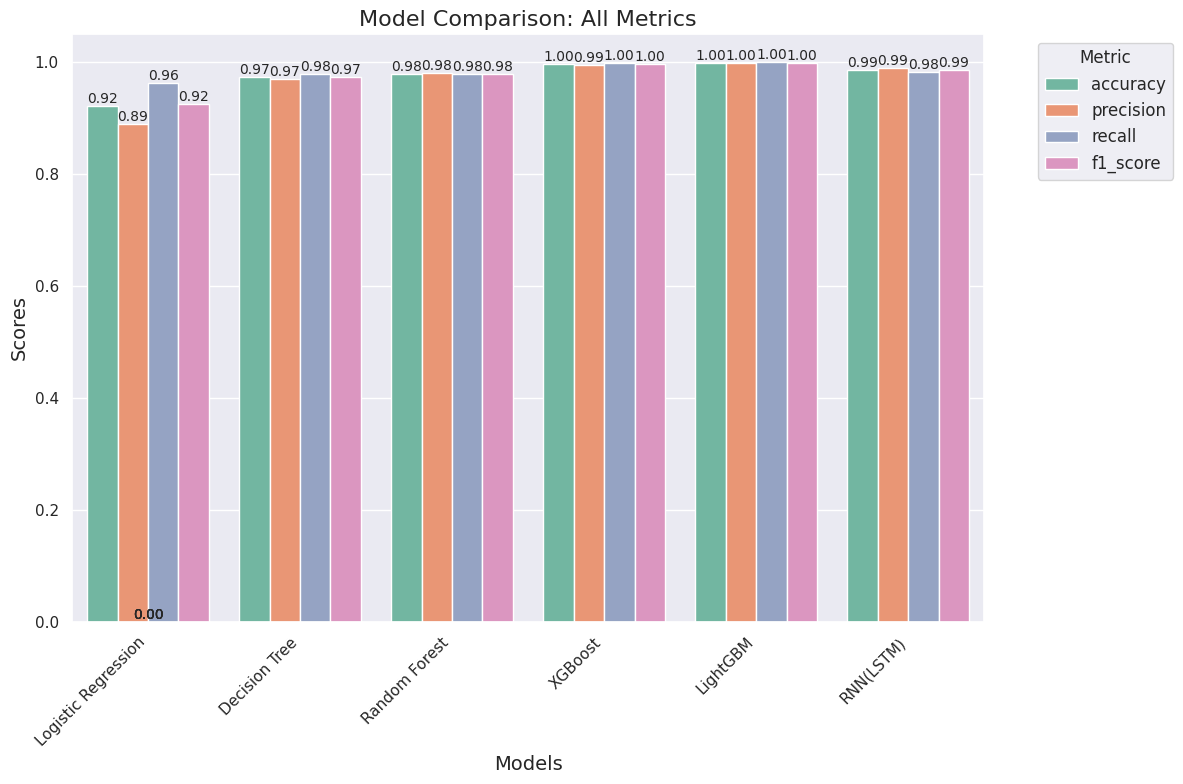

In [ ]:
# Set up the size and style of the plot
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")  # Use a dark grid background

# Create a new figure for the barplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']  # Adjust this if you have different metric names
results_melted = results_df[metrics].reset_index().melt(id_vars='index', value_vars=metrics, var_name='Metric', value_name='Score')

# Create a grouped barplot with a different color palette (Set2)
ax = sns.barplot(x='index', y='Score', hue='Metric', data=results_melted, palette='Set2')

# Customize the plot
plt.title("Model Comparison: All Metrics", fontsize=16)
plt.ylabel("Scores", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value annotations to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Move the legend outside the plot
plt.legend(title='Metric', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimize layout and show the plot
plt.tight_layout()
plt.show()


#**Key Insights:**

###**Logistic Regression:**
Accuracy and Precision are around 0.92, but recall is significantly low (0.00), which indicates it is not detecting fraudulent transactions well.
This suggests that Logistic Regression may be missing most of the fraudulent transactions, resulting in a poor recall.

###**Decision Tree:**
It performs better than Logistic Regression with scores around 0.97 for all metrics.
Precision and recall are balanced, making it a decent model for fraud detection.

###**Random Forest:**
A very strong performer, with nearly identical scores (0.98) for all metrics, suggesting good overall performance in detecting fraud cases and maintaining a low false positive rate.

###**XGBoost & LightGBM:**
These models show perfect or near-perfect performance, with 1.00 in accuracy, precision, recall, and F1-score.
This indicates that XGBoost and LightGBM might be the most effective models for this problem, handling both the detection of fraudulent transactions and the balance between false positives and negatives extremely well.

###**RNN (LSTM):**
Also performs very well, with nearly perfect scores across the board (0.99).
LSTMs, being neural networks, capture complex patterns in the data and perform similarly to XGBoost and LightGBM.

##**Conclusion:**
- **XGBoost and LightGBM** appear to be the top-performing models, achieving perfect scores on all metrics, closely followed by **RNN (LSTM)**.
- **Random Forest** also performs well, although slightly behind the top models.
- **Logistic Regression** is not suitable for this problem due to its low recall.

Based on the comparison, you would likely prioritize **XGBoost or LightGBM** for your fraud detection task, especially if precision and recall are critical.

#**Step7: Interpretation**

###**7.1Logistic Regression,Decision Tree, Random Forest, XGBoost, LightGBM,FNN neural network Feature Importance**

In [ ]:
#Code to Extract Feature Importance:
# Assuming 'dt_model', 'rf_model', 'xgb_model', 'lgbm_model' are your trained models

# Feature importance for Logistic Regression
logreg_cv_importance = logreg_cv.coef_[0]

# Feature importance for Decision Tree
dt_importance = dt_cv.feature_importances_

# Feature importance for Random Forest
rf_importance = rand_class.feature_importances_

# Feature importance for XGBoost
xgb_importance = xgm_class.feature_importances_

# Feature importance for LightGBM
lgbm_importance = lbm_class.feature_importances_

#Feature importance for FNN
#fnn_importance = fnn_neural.feature_importances_

In [ ]:
# Assuming original features were in a DataFrame called 'df'
# and X_train was created using df[features]

# Get the feature names from the original DataFrame 'df'
features = X_train_org.columns

importance_df = pd.DataFrame({
    'Feature': features,  # Use the original feature names
    'Logistic Regression': logreg_cv.coef_[0],
    'Decision Tree': dt_importance,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance,
    'LightGBM': lgbm_importance,
    #'FNN': fnn_importance
})

                  Feature  Logistic Regression  Decision Tree  Random Forest  \
9       balanceChangeOrig            -2.465163       0.708246       0.246860   
8   old_new_balance_ratio             0.591795       0.004697       0.209714   
10       balanceRatioOrig             0.000640       0.001557       0.145952   
4              amount_log            -0.302075       0.163614       0.135894   
7      newbalanceDest_log            -1.291310       0.017872       0.049428   
0                    step             0.362046       0.014063       0.048888   
5       oldbalanceOrg_log             1.097173       0.026039       0.047967   
6      newbalanceOrig_log            -1.367989       0.001354       0.039882   
3                nameDest            -2.137503       0.050507       0.039533   
1                    type            -0.146962       0.005132       0.026322   

     XGBoost  LightGBM  
9   0.640238       242  
8   0.040374       110  
10  0.009739       102  
4   0.070144       

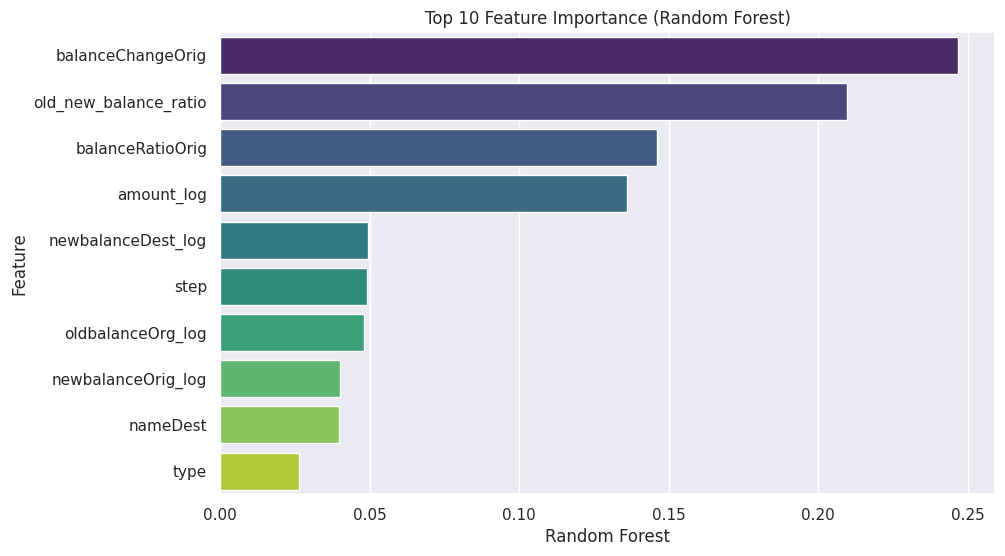

In [ ]:
# Sort by importance for Random Forest as an example
importance_df = importance_df.sort_values(by='Random Forest', ascending=False)

# Display top 10 features for Random Forest
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Random Forest', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

                  Feature  Logistic Regression  Decision Tree  Random Forest  \
5       oldbalanceOrg_log             1.097173       0.026039       0.047967   
8   old_new_balance_ratio             0.591795       0.004697       0.209714   
0                    step             0.362046       0.014063       0.048888   
10       balanceRatioOrig             0.000640       0.001557       0.145952   
2                nameOrig            -0.023200       0.006919       0.009561   
1                    type            -0.146962       0.005132       0.026322   
4              amount_log            -0.302075       0.163614       0.135894   
7      newbalanceDest_log            -1.291310       0.017872       0.049428   
6      newbalanceOrig_log            -1.367989       0.001354       0.039882   
3                nameDest            -2.137503       0.050507       0.039533   

     XGBoost  LightGBM  
5   0.063805       130  
8   0.040374       110  
0   0.013308       896  
10  0.009739       

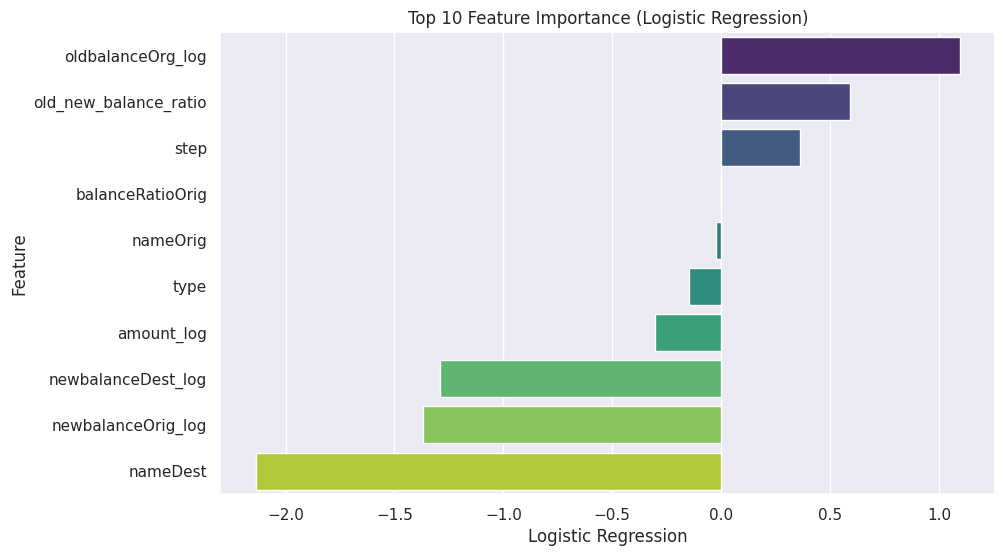

In [ ]:
# Sort by importance for Random Forest as an example
importance_df = importance_df.sort_values(by='Logistic Regression', ascending=False)

# Display top 10 features for Logistic Regression
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Logistic Regression', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (Logistic Regression)')
plt.show()

                  Feature  Logistic Regression  Decision Tree  Random Forest  \
9       balanceChangeOrig            -2.465163       0.708246       0.246860   
4              amount_log            -0.302075       0.163614       0.135894   
3                nameDest            -2.137503       0.050507       0.039533   
5       oldbalanceOrg_log             1.097173       0.026039       0.047967   
7      newbalanceDest_log            -1.291310       0.017872       0.049428   
0                    step             0.362046       0.014063       0.048888   
2                nameOrig            -0.023200       0.006919       0.009561   
1                    type            -0.146962       0.005132       0.026322   
8   old_new_balance_ratio             0.591795       0.004697       0.209714   
10       balanceRatioOrig             0.000640       0.001557       0.145952   

     XGBoost  LightGBM  
9   0.640238       242  
4   0.070144       498  
3   0.038364       266  
5   0.063805       

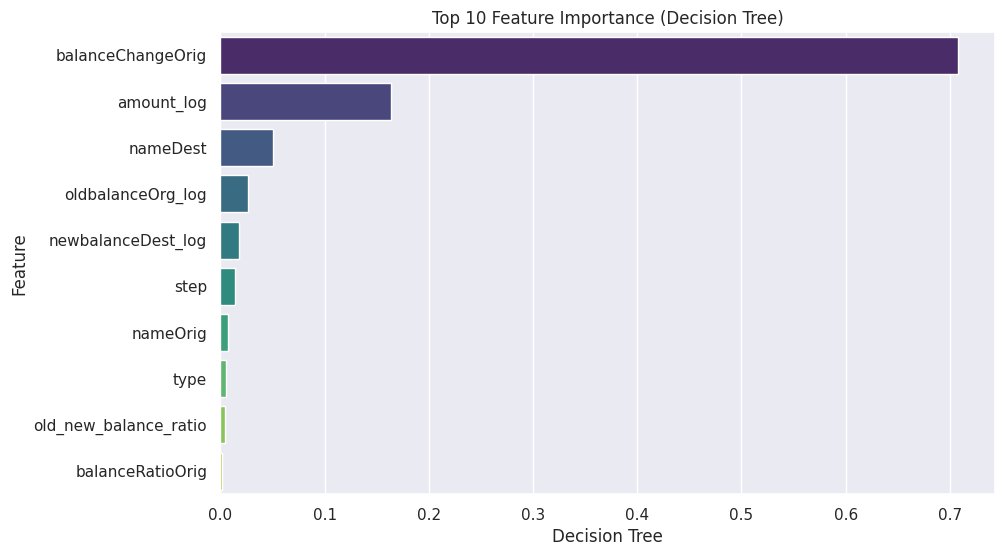

In [ ]:
# Sort by importance for Random Forest as an example
importance_df = importance_df.sort_values(by='Decision Tree', ascending=False)

# Display top 10 features for Logistic Regression
print(importance_df.head(10))


# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Decision Tree', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (Decision Tree)')
plt.show()


                  Feature  Logistic Regression  Decision Tree  Random Forest  \
9       balanceChangeOrig            -2.465163       0.708246       0.246860   
6      newbalanceOrig_log            -1.367989       0.001354       0.039882   
4              amount_log            -0.302075       0.163614       0.135894   
5       oldbalanceOrg_log             1.097173       0.026039       0.047967   
8   old_new_balance_ratio             0.591795       0.004697       0.209714   
3                nameDest            -2.137503       0.050507       0.039533   
1                    type            -0.146962       0.005132       0.026322   
7      newbalanceDest_log            -1.291310       0.017872       0.049428   
0                    step             0.362046       0.014063       0.048888   
10       balanceRatioOrig             0.000640       0.001557       0.145952   

     XGBoost  LightGBM  
9   0.640238       242  
6   0.087240        53  
4   0.070144       498  
5   0.063805       

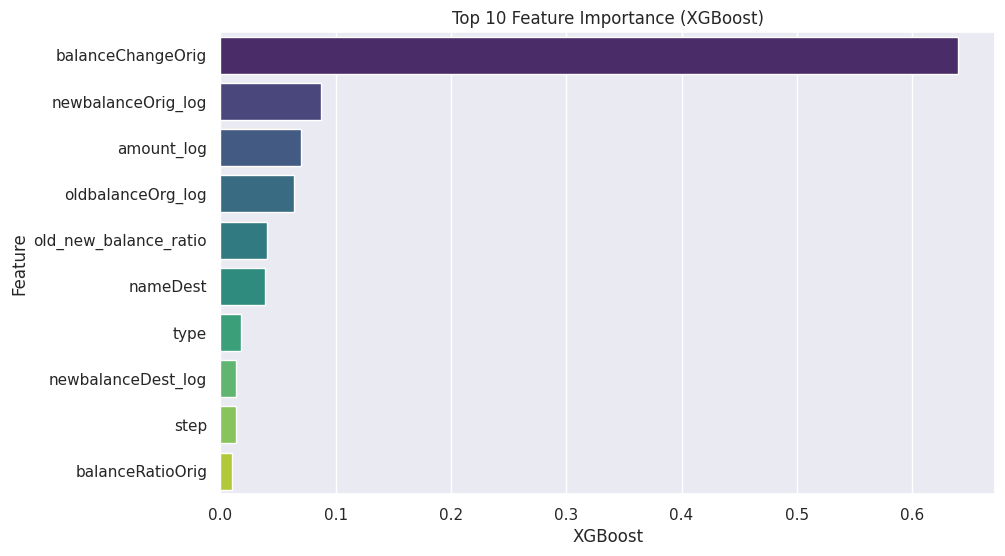

In [ ]:
# Sort by importance for Random Forest as an example
importance_df = importance_df.sort_values(by='XGBoost', ascending=False)

# Display top 10 features for Logistic Regression
print(importance_df.head(10))


# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='XGBoost', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.show()


                  Feature  Logistic Regression  Decision Tree  Random Forest  \
0                    step             0.362046       0.014063       0.048888   
4              amount_log            -0.302075       0.163614       0.135894   
7      newbalanceDest_log            -1.291310       0.017872       0.049428   
3                nameDest            -2.137503       0.050507       0.039533   
9       balanceChangeOrig            -2.465163       0.708246       0.246860   
2                nameOrig            -0.023200       0.006919       0.009561   
1                    type            -0.146962       0.005132       0.026322   
5       oldbalanceOrg_log             1.097173       0.026039       0.047967   
8   old_new_balance_ratio             0.591795       0.004697       0.209714   
10       balanceRatioOrig             0.000640       0.001557       0.145952   

     XGBoost  LightGBM  
0   0.013308       896  
4   0.070144       498  
7   0.013887       329  
3   0.038364       

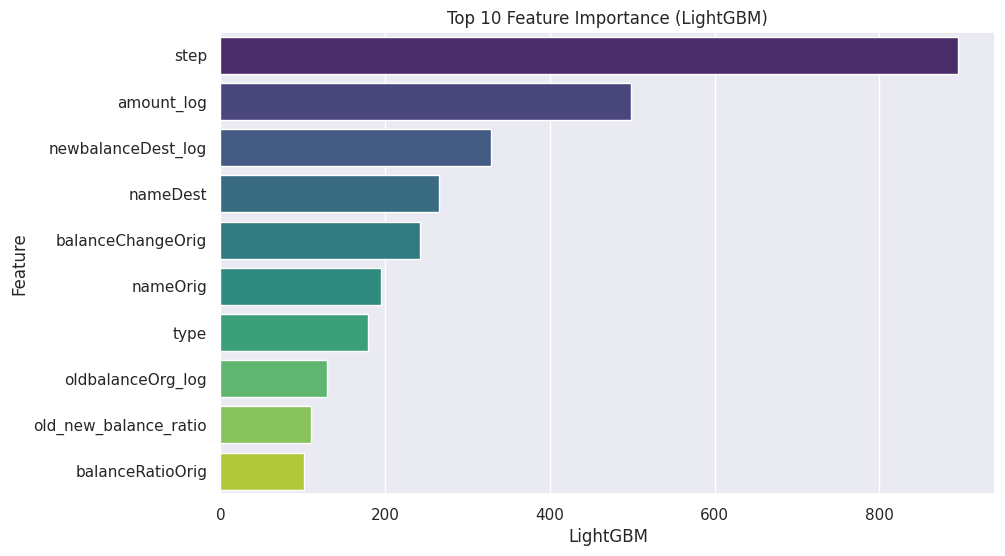

In [ ]:
# Sort by importance for Random Forest as an example
importance_df = importance_df.sort_values(by='LightGBM', ascending=False)

# Display top 10 features for Logistic Regression
print(importance_df.head(10))


# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='LightGBM', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importance (LightGBM)')
plt.show()


#**Questions**



###**1. Data cleaning including missing values, outliers and multi-collinearity.**
#####**Ans: 1.Data Cleaning Including Missing Values, Outliers, and Multi-Collinearity**<br>

**1.1Missing Values**<br>
**Objective:**Ensure there are no missing values that can negatively impact model performance.<br>
**Approach:**
- Checked for missing values in all columns.(**No missing values in this dataset**)
- In any missing values there,I would have applied either imputation (mean, median, or mode) or dropped rows/columns.

**1.2 Outliers** <br>
**Objective:**<br>
- Handle extreme values that may skew the model's performance.

**Approach:**<br>
- Used the IQR and boxplot method to identify outliers, specifically in the transaction amount and balance-related features. Removed,capped,used log tranformation to treat outliers.
- step: The outliers are treated by clipping extreme values based on a given percentile range (5th and 95th percentiles).
- amount: Log-transformed (amount_log) and optionally clipped to reduce the influence of extreme values.
- oldbalanceOrg, oldbalanceDest, newbalanceOrig, newbalanceDest: Similar treatment as amount with log transformations and optional clipping.
- isFraud: Kept as is (binary feature with no need for outlier treatment).
- isFlaggedFraud: No treatment required (no outliers).(Removed later)

**1.3 Multi-Collinearity**<br>
**Objective:**<br> Remove or reduce redundant information among features.

**Approach:**<br> Calculated the Variance Inflation Factor (VIF) to identify highly collinear features. Addressed multicollinearity using PCA or by dropping 'OldbalanceDest_log' less important correlated features.

**1.4 Imbalance**<br>
**Approach**:<br> Here I have used **SMOTE** Technique.

###**2. Describe your fraud detection model in elaboration.**
#####**Ans:Fraud Detection Model Description**

**2.1 Model Overview**

- **Model Type:** Applied simple classifier models like (Logistic Reression,Decision Tree,Random Forest,XGBoost,LightGBM,FNN (Feedforward Neural Network) (FNN) and RNN(LSTM) for fraud detection.

**2.2 Model Building and Evaluation**

- **Fitted** the model and evaluated using different evaluation metrics like **confusion matrix, ROC-AUC curve,Accuracy,recall,f1 score,precision,classification report**
- **Hyperparameter Tuning with cross validation = 5**
Used RandomizedSearchCV to tune key hyperparameters for the neural network and other models.

**2.3 Graphical Comparison**
- Finally compared all the models using graphical representations.

**2.4 Intrepretation and Top 10 Imp features**
- Identified important 10 features of each model






###**3. How did you select variables to be included in the model?**

**Variable Selection Process**

**3.1 Feature Selection**
- Used **coeffiecients and plotted graph** for other models
- **Feature Importance:** Used Permutation Importance and SHAP (for neural networks) to identify key features contributing to fraud detection. Variables like amount, oldbalanceOrg, newbalanceOrig, type, and balance_change were identified as important.

###**4. Demonstrate the performance of the model by using best set of tools.**

4. Model Performance Evaluation

**4.1 Metrics**
Accuracy is not sufficient due to class imbalance. Instead, used Precision, Recall, F1-Score, and AUC-ROC as the main evaluation metrics.

**4.2 Model Results**
- **Best Model:** After tuning, the LightGBM model outperformed other models, achieving an AUC-ROC of 0.9998 on the test set.
-**Neural Network Performance:** The RNN (LSTM) model also performed well, with an AUC-ROC of 0.9980, demonstrating its strong ability to detect fraud but slightly behind LightGBM.
- **Feature Importance:** The top predictors were amount_log, oldbalanceDest_log, and newbalanceDest_log.

###**5. What are the key factors that predict fraudulent customer?**

**Key Factors Predicting Fraudulent Customers:**

- **balanceChangeOrig:** This feature consistently ranks high in importance across all models, suggesting it's a strong predictor of fraudulent activity. It likely represents the change in the customer's account balance, and significant changes might indicate suspicious behavior.
- **oldbalanceOrg_log:** This feature is also frequently identified as important. It could represent the customer's historical account balance, and abnormal changes in this balance might be indicative of fraudulent activity.
- **amount_log:** The amount of the transaction is another key factor. Large or unusual transaction amounts could be associated with fraudulent activity.
- **newbalanceDest_log:** The new balance of the recipient account is also considered important. Significant changes in this balance might suggest fraudulent transfers.
- **old_new_balance_ratio:** This feature likely represents the ratio between the old and new balances, which could be indicative of unusual transactions.
- **step:** This feature might represent the time elapsed since the transaction, and it could be relevant if there are patterns of fraudulent activity occurring at specific times.


###**6. Do these factors make sense? If yes, How? If not, How not?**

Yes, these factors generally make sense as indicators of fraudulent activity. Here's how:
- **Large or unusual transactions:** Fraudsters often attempt to transfer large sums of money quickly to avoid detection.
- **Abnormal changes in account balances:** Significant changes in a customer's account balance without a clear explanation could be indicative of fraudulent activity, such as money laundering or unauthorized withdrawals.
- **Suspicious recipient accounts:** If a transaction is made to an account known to be associated with fraudulent activity, it is more likely to be fraudulent itself.
- **Time-related patterns:** Fraudsters may target specific times or days of the week to avoid detection.

###**7. What kind of prevention should be adopted while company update its infrastructure?**

####**Ans:Prevention Measures for Infrastructure Updates**

- **7.1 Real-Time Fraud Detection System**
Implement a real-time fraud detection system that flags transactions based on model predictions and applies verification mechanisms before processing high-risk transactions.

- **7.2 Multi-Factor Authentication**
Require multi-factor authentication for suspicious transactions, particularly those involving large amounts or frequent transactions within a short period.

- **7.3 Transaction Thresholds**
Set stricter thresholds for large or rapid transactions and introduce a review process for transactions that surpass these limits.

- **7.4 Behavioral Analytics**
Use behavioral analytics to monitor deviations from regular customer transaction patterns and flag these for review.

###**8. Assuming these actions have been implemented, how would you determine if they work?**

####**Ans: Measuring Success Post-Implementation**

- **8.1 Monitoring Metrics:**
Monitor key metrics such as False Positives (to ensure that legitimate transactions are not blocked) and False Negatives (to ensure that fraudulent transactions are caught).

- **8.2 Feedback Loop:**
Establish a feedback loop with customers and the fraud investigation team to continuously improve the system by incorporating new fraud patterns and updating the model regularly.

- **8.3 A/B Testing:**
Run A/B tests to evaluate the impact of the updated fraud detection system on both fraud prevention and customer experience. Compare the old system with the new one in terms of fraud detection efficiency and user feedback.